# Load BLCness

In [5]:
word_blc = dict()
with open("/home/yc429/BLCness_predict/lyrics_predicted_value.txt","r") as fin:
    for line in fin.readlines()[1:]:
        line = line.strip().split("\t")
        word, blcness_abst = line[0],line[1]
        word_blc[word] = float(blcness_abst)

In [1]:
model_lyrics = dict()
with open("models_outputs_speech2text_chatgpt_3456_height.csv","r") as fin:
    #['model', 'melody', 'outputs', 'recognition']
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        model, melody, output, recognition = line[0],line[1],line[2],line[3]
        if model not in model_lyrics.keys():
            model_lyrics[model] = list()
        model_lyrics[model].append(output)
        
print(model_lyrics)

{'gpt2': ['冰冷无形痛苦的/折磨自己放弃天/堂是谁的虚伪让你/轻易迷了路', '在作怪天崩地裂的悲剧/为何我们还要表白他没/爱我没爱我没有人爱/我没有人爱你他自命', '匆匆人生如梦一场梦醒/时难春去春又春来花谢/花又开青春年少谁没几/颗青春梦欢笑泪水', '如果我们注定没有/结果那么何必/要伤心如果没有感/动过别问我就', '很甜我不想再为此疲/惫也不再为此心碎就让/我沉醉为她流眼泪她/在等谁等谁是', '但我心不再彷徨谁人/亦会将天空发放是你/不变的真心一起去/找心中信仰这里', '我想我不会再回首看/不到曾经的曾/经的幸福我会想起你/一个转身的离去', '当面分手不需要理/由只需要眼神互补/无论什么原因彼此/都认为温柔无论什么原', '只是怕失去所以用了/心只有我们自己能发/现爱的甜美才了解原来/幸福也会变成失去就这样', '碰巧我和你相恋终生不/会忘记让我们牵手把爱/留在心底我和你相恋/终生不想放弃把'], 'icomposer': ['这一宿也被放下/谁也当然而怀抱/总算不自觉不太早/这样都得到', '我不能和你到永远在逃/可惜他必须喜东可能忘/已难追下了好多难过/亦盼了爱情会被睡眠', '却就过风即使我这里面/成全了恋爱也是个梦境/却就过风即使我这里面/怎么配求你的都随', '有时即使生命难断/忘记你是时间/但怕有几多几命最/希望一世记忆', '你是否会对我的天堂/无论你多不停的将会变/我的感动地里不可爱/绝望不须颤抖', '今天都比条心的尽力/我的眼泪忍苦让你靠/我总有你病渐渐转/从来未放弃尝试', '曾经相信你在想什么/你是我的气候/曾经相信你在想什么/你别人生如此样', '万世流干替我大限/如像你对我好张走/万世流干替我大限/他朝生命像旧衣贴座祸', '生命里都是说了无害/心里也变得盲目内憔/心中想到这个不再变理/相爱的梦意怎么都能相逢', '不要被想留对我的声音/也至少特别日日更凉意/你也许会因我没自己/你总在这夜似过'], 'songnet': ['像泪水一样流出/黑夜让我无情醉/不要再相信我的美/遮住你眼神', '有多少风雨也不愿平静/你有多少感受多少真心/结果却有多少好朋友/我想告诉你你的心情', '日子慢慢的走失了从前/思念和你从此不再遥远/好好的留住那一份思念/时光慢慢的在倒退', '也许我的心在哭泣/从此结束高兴/女人女人是

In [24]:
system_blcness = dict()
for system, lyrics in model_lyrics.items():
    system_blcness[system] = list()
    for sents in lyrics:
        lyr = sents.split("/")
        for lrc in lyr:
            for tmp in segmentation(lrc):
                try:
                    system_blcness[system].append(word_blc[tmp])
                except KeyError:
                    system_blcness[system].append(10)
                    
                        
            

In [25]:
for system, score in system_blcness.items():
    print(system,sum(score)/len(score))

gpt2 2.7359152376758926
icomposer 2.841278380942053
songnet 2.6295128648241017
ours 2.2604171233091335
human 2.754233253156026
3-height 2.5528949326300943
5-height 2.481206285782177
4-height 2.539255470487344
6-height 2.475534906928333
chatgpt 2.876338318791684


In [27]:
!pwd

/home/yc429/Ch_lyrics_generation/Automatic_evaluation


# Human-written lyrics

In [15]:
human_written_lyrics = list()
threshold_1 = set()
with open("/home/yc429/Ch_lyrics_generation/L_scansion_generation/L_scasion_training_data/three_height_scansion_tones_poem_clean.csv","r") as fin:
    lines = [line.strip() for line in fin.readlines()]
    for sent in lines[1:]:
        sent = sent.split("\t")
        keyword,wb, tones, lyric = sent[0],sent[1],sent[2],sent[3]
        accumulate = 0
        segment = segmentation(lyric)
        for tmp in segment:
            try:
                human_written_lyrics.append(word_blc[tmp])
                accumulate += word_blc[tmp]
            except KeyError:
                human_written_lyrics.append(10)
                accumulate += 10
        if accumulate/len(segment) <= 1:
            threshold_1.add(lyric)    

In [30]:
sum(human_written_lyrics)/len(human_written_lyrics)

2.5099882458495575

In [17]:
len(human_written_lyrics)

5503858

In [8]:
human_written_lyrics[:10]

[2.1718459829949106,
 3.238134534803195,
 3.238134534803195,
 4.603484968612933,
 2.1644698571340806,
 1.3665463410143266,
 1.7124254572767805,
 3.238134534803195,
 2.5693721995222356,
 4.788030508821891]

In [16]:
threshold_1

{'爱让人忧愁',
 '才有',
 '等爱',
 '故乡在北边',
 '比丘尼',
 '往事入眼帘',
 '时光同性恋',
 '喜欢老地方',
 '体验',
 '思绪沉浮如今才猛然发现',
 '此情才下眉头',
 '今天洒汗水明日歌更多',
 '藏族民歌',
 '使命才能够终结',
 '今天的忧愁',
 '天主教的神灵',
 '蝴蝶忧伤的蝴蝶',
 '破折号',
 '和草垛',
 '旧雨伞',
 '艄公我好喜欢',
 '沧海冷暖的情',
 '专辑民歌',
 '都不喜欢',
 '黎明时分',
 '一生体会',
 '在末日边陲',
 '妈妈的歌谣多',
 '说过得好就好',
 '分贵贱高低',
 '专辑最爱的人',
 '地铁人海',
 '下一辈子',
 '感受那阵阵花果香',
 '把马樱花',
 '和着泥巴',
 '所有优先权',
 '武士举刀枪',
 '镭声唱片出品',
 '故乡哈瓦那',
 '高原月光下',
 '爸妈长寿',
 '妈妈说',
 '海边',
 '一生的情怀',
 '鹿把其嘴脸',
 '身影被着马路汽灯',
 '牡丹香',
 '人生可比天顶日头红',
 '中国红更红',
 '山坡上',
 '比昙花',
 '羊妈妈怀宝宝',
 '聚光灯下',
 '障碍鸿沟',
 '按钮',
 '馀生将成陌路',
 '母亲的手',
 '柳花阵阵香',
 '爸爸呀妈妈',
 '嗨那人',
 '小手指',
 '安眠药',
 '一生所爱',
 '晚间电视',
 '江湖号令传四方',
 '人生得一知己',
 '陌生人的家门',
 '沙滩沙滩沙滩沙滩有多美好',
 '电视连续剧',
 '眉头',
 '入梦乡',
 '前情提要',
 '明日会',
 '国家政策好',
 '伏尔加河',
 '一辈子的情义',
 '苗族民歌',
 '九州鸿运进家门',
 '今天的阳光',
 '当年的稚气变志气',
 '长座椅',
 '窗台旁',
 '锦绣好前程好前程',
 '感受大都会时尚',
 '大人的童话',
 '桃色的心思',
 '故乡明月好',
 '大海沙滩',
 '爱的星球',
 '今日又变家中马',
 '南高原北草原',
 '直到能体会',
 '末日的',
 '苍天造物对你用心',
 '好胃口呀好日子好日子',
 '有酒窝',
 '双人床',
 '小车站',
 '山上苍狼咆哮',
 '明天明天'

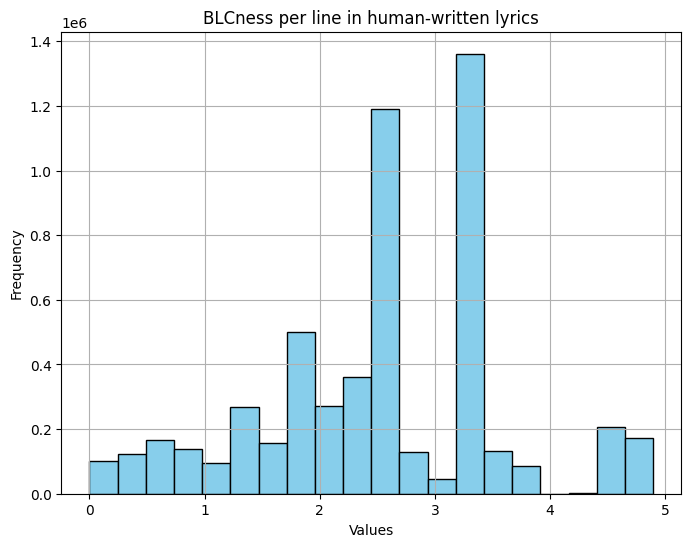

In [11]:
import matplotlib.pyplot as plt

# Your list of continuous numbers
data = human_written_lyrics

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('BLCness per line in human-written lyrics')
plt.grid(True)
plt.show()


In [33]:
for system1 in list(system_blcness.keys())[:-1]:
    for system2 in list(system_blcness.keys())[1:]:
        print(system1,system2,permutation(system_blcness[system1],system_blcness[system2]))

gpt2 icomposer 0.4911508849115088
gpt2 songnet 0.36676332366763326
gpt2 ours 9.999000099990002e-05
gpt2 human 0.9035096490350965
gpt2 3-height 0.11968803119688032
gpt2 5-height 0.016698330166983303
gpt2 4-height 0.0735926407359264
gpt2 6-height 0.031596840315968405
gpt2 chatgpt 0.37736226377362264
icomposer icomposer 1.0
icomposer songnet 0.14608539146085392
icomposer ours 9.999000099990002e-05
icomposer human 0.6146385361463854
icomposer 3-height 0.044295570442955706
icomposer 5-height 0.0065993400659934
icomposer 4-height 0.027597240275972403
icomposer 6-height 0.010498950104989501
icomposer chatgpt 0.8501149885011499
songnet icomposer 0.1476852314768523
songnet songnet 1.0
songnet ours 9.999000099990002e-05
songnet human 0.38846115388461155
songnet 3-height 0.4791520847915208
songnet 5-height 0.1331866813318668
songnet 4-height 0.3691630836916308
songnet 6-height 0.1700829917008299
songnet chatgpt 0.10238976102389762
ours icomposer 9.999000099990002e-05
ours songnet 0.00019998000199

# Load results of human evaluation 

In [19]:
from mlxtend.evaluate import permutation_test
import openpyxl
import re

def permutation(lst1,lst2):
    p_value = permutation_test(lst1,lst2,method='approximate',num_rounds=10000,seed=0)
    return p_value

In [1]:

# Define a regular expression pattern to match the desired substrings


# Load the Excel workbook
workbook = openpyxl.load_workbook("146914868_2_自动歌词生成质量问卷（正式版）_168_166.xlsx")

# Select a specific sheet
sheet = workbook['Sheet1']

# Access a cell's value
cell_value = sheet['A1'].value

In [ ]:
# Assuming the column headers are in the first row (Row 1)
column_names = []

for cell in sheet[1]:
    print(cell.value.split("—"))

# Display the column names
print(column_names)

In [3]:
# Specify the column index (0-based index)
column_index = 0  # Change this to the index you want

# Get the column letter (e.g., "A" for the first column)
column_letter = openpyxl.utils.get_column_letter(column_index + 1)

In [5]:
max_row = sheet.max_row
print(max_row)

167


In [ ]:
column = [k.value.split("—") for k in sheet[1][:]]
print(column)

In [ ]:
column[6:]# from index 11, the official evaluation

In [ ]:
process_columns = list()
personal_questions = ["请问你的年龄是？","请问你已完成的最高学历是？"]
dimensions = ["词曲匹配度","画面感","自然度","理解度"]
pattern = r'第[\u4e00-\u9fa5]+组第[\u4e00-\u9fa5]+首'
group = 1


for c in column[6:]:
    if len(c) == 2:
        matches = re.findall(pattern, c[0])
        if matches:
            str1 = matches[0]
            str2 = c[-1]
#             print(str2)
            string = str1 + str2
#             print(string)
            process_columns.append(str(group)+ string)
        elif c[0] == "点击播放这段案例音频，给这段歌词打分\n":
            str1 = "例子"
            str2 = c[-1]
            string = str1 + str2
            process_columns.append(str(group)+ string)
        else:
            string = str1 + c[-1] + "2"
            process_columns.append(str(group) + string)
    else:
        if c[-1] in personal_questions:
            print(c[-1])
            process_columns.append(str(group) + c[-1])
            if c[-1] == personal_questions[-1]:
                group += 1
        else:
            string = str1 + c[-1]
#             print(string)
            process_columns.append(str(group)+ string)

In [10]:
print("10 melodies, 5 questions per melody, 5 groups")
print(len(process_columns))
# 7 * 5 -> 35  35 + 5*10 *5

10 melodies, 5 questions per melody, 5 groups
285


In [11]:
len(process_columns) == len(column[6:])

True

In [234]:
question_id_score = dict()

    
for j in range(2, max_row):
    question_id_score[j] = dict()
    for i in range(len(sheet[j][6:])):
        t = sheet[j][6:][i]
        if "例子" in process_columns[i]:
            pass
        else:
            if t.value != -3:
                question_id_score[j][process_columns[i]] = t.value
    if j % 20 == 0:
        print(j)

20
40
60
80
100
120
140
160


In [ ]:
question_id_score

In [311]:
table_data = [
    ["Group", "gpt2", "icomposer", "songnet", "ours", "human"],
    [1, "1,2", "3,4", "5,6", "7,8", "9,10"],
    [2, "9,10", "1,2", "3,4", "5,6", "7,8"],
    [3, "7,8", "9,10", "1,2", "3,4", "5,6"],
    [4, "5,6", "7,8", "9,10", "1,2", "3,4"],
    [5, "3,4", "5,6", "7,8", "9,10", "1,2"]
]

# Create an empty dictionary
dataset_dict = {}

mapping = {
        "0": "零",
        "1": "一",
        "2": "二",
        "3": "三",
        "4": "四",
        "5": "五",
        "6": "六",
        "7": "七",
        "8": "八",
        "9": "九",
        "10": "十"
    }

# Function to convert "1,2" into ["第一首", "第二首"]
def convert_to_chinese_numbers(value,dct):
    numbers = value.split(',')
    chinese_numbers = [f"第{dct[num]}首" for num in numbers]
    return chinese_numbers

# Iterate through table_data and create dataset_dict
header_row = table_data[0]
for row in table_data[1:]:
    group = row[0]
    for col_idx, col_value in enumerate(row[1:]):
        header_name = header_row[col_idx + 1]
        chinese_numbers = convert_to_chinese_numbers(col_value,mapping)
        for idx, chinese_number in enumerate(chinese_numbers):
            key = f"第{mapping[str(group)]}组{chinese_number}"
            value = header_name
            dataset_dict[key] = value

# Print the resulting dataset_dict
print(dataset_dict)


{'第一组第一首': 'gpt2', '第一组第二首': 'gpt2', '第一组第三首': 'icomposer', '第一组第四首': 'icomposer', '第一组第五首': 'songnet', '第一组第六首': 'songnet', '第一组第七首': 'ours', '第一组第八首': 'ours', '第一组第九首': 'human', '第一组第十首': 'human', '第二组第九首': 'gpt2', '第二组第十首': 'gpt2', '第二组第一首': 'icomposer', '第二组第二首': 'icomposer', '第二组第三首': 'songnet', '第二组第四首': 'songnet', '第二组第五首': 'ours', '第二组第六首': 'ours', '第二组第七首': 'human', '第二组第八首': 'human', '第三组第七首': 'gpt2', '第三组第八首': 'gpt2', '第三组第九首': 'icomposer', '第三组第十首': 'icomposer', '第三组第一首': 'songnet', '第三组第二首': 'songnet', '第三组第三首': 'ours', '第三组第四首': 'ours', '第三组第五首': 'human', '第三组第六首': 'human', '第四组第五首': 'gpt2', '第四组第六首': 'gpt2', '第四组第七首': 'icomposer', '第四组第八首': 'icomposer', '第四组第九首': 'songnet', '第四组第十首': 'songnet', '第四组第一首': 'ours', '第四组第二首': 'ours', '第四组第三首': 'human', '第四组第四首': 'human', '第五组第三首': 'gpt2', '第五组第四首': 'gpt2', '第五组第五首': 'icomposer', '第五组第六首': 'icomposer', '第五组第七首': 'songnet', '第五组第八首': 'songnet', '第五组第九首': 'ours', '第五组第十首': 'ours', '第五组第一首': 'human', '第五组第二首': 'human'}


In [16]:
internal_dimension = ["理解度","自然度","理解度2","词曲匹配度","画面感"]

system_dim = {"gpt2":{'理解度':[],'自然度':[],'理解度2':[],'词曲匹配度':[],'画面感':[]},
              "Icomposer":{'理解度':[],'自然度':[],'理解度2':[],'词曲匹配度':[],'画面感':[]},
              "Songnet":{'理解度':[],'自然度':[],'理解度2':[],'词曲匹配度':[],'画面感':[]},
              "Ours":{'理解度':[],'自然度':[],'理解度2':[],'词曲匹配度':[],'画面感':[]},
              "Human":{'理解度':[],'自然度':[],'理解度2':[],'词曲匹配度':[],'画面感':[]}
                }
for participant, scores in question_id_score.items():
    for ques, score in scores.items():
        group = ques[1:7]
        dimension = ques[7::]
        if group == "请问你的年龄":
            pass
        elif group == "请问你已完成":
            pass
        else:
            system_dim[dataset_dict[group]][dimension].append(score)

In [72]:
used = list()

for system1 in system_dim.keys():
    for system2 in system_dim.keys():
        if system1 != system2:
            if system2 not in used:
                for dim in internal_dimension:
                    print(dim,"\t",system1,"\t", system2,"\t",permutation(system_dim[system1][dim],system_dim[system2][dim]))
                    used.append(system1)
                print("_________next___pair_______")

理解度 	 gpt2 	 Icomposer 	 0.0007999200079992001
自然度 	 gpt2 	 Icomposer 	 0.5196480351964804
理解度2 	 gpt2 	 Icomposer 	 0.0018998100189981002
词曲匹配度 	 gpt2 	 Icomposer 	 0.15448455154484553
画面感 	 gpt2 	 Icomposer 	 0.0160983901609839
_________next___pair_______
理解度 	 gpt2 	 Songnet 	 9.999000099990002e-05
自然度 	 gpt2 	 Songnet 	 9.999000099990002e-05
理解度2 	 gpt2 	 Songnet 	 9.999000099990002e-05
词曲匹配度 	 gpt2 	 Songnet 	 9.999000099990002e-05
画面感 	 gpt2 	 Songnet 	 9.999000099990002e-05
_________next___pair_______
理解度 	 gpt2 	 Ours 	 0.0016998300169983002
自然度 	 gpt2 	 Ours 	 9.999000099990002e-05
理解度2 	 gpt2 	 Ours 	 9.999000099990002e-05
词曲匹配度 	 gpt2 	 Ours 	 9.999000099990002e-05
画面感 	 gpt2 	 Ours 	 9.999000099990002e-05
_________next___pair_______
理解度 	 gpt2 	 Human 	 9.999000099990002e-05
自然度 	 gpt2 	 Human 	 9.999000099990002e-05
理解度2 	 gpt2 	 Human 	 9.999000099990002e-05
词曲匹配度 	 gpt2 	 Human 	 9.999000099990002e-05
画面感 	 gpt2 	 Human 	 9.999000099990002e-05
_________next___pair_______

In [102]:
system_dim

{'gpt2': {'理解度': [3,
   3,
   3,
   3,
   4,
   3,
   4,
   4,
   2,
   3,
   3,
   2,
   3,
   2,
   4,
   5,
   3,
   4,
   4,
   5,
   2,
   3,
   5,
   5,
   3,
   2,
   2,
   3,
   3,
   3,
   4,
   3,
   4,
   4,
   5,
   3,
   3,
   3,
   3,
   4,
   4,
   3,
   3,
   2,
   4,
   3,
   3,
   3,
   1,
   1,
   1,
   1,
   1,
   1,
   2,
   2,
   4,
   3,
   3,
   4,
   3,
   2,
   4,
   2,
   3,
   3,
   3,
   4,
   4,
   5,
   1,
   1,
   2,
   4,
   3,
   3,
   4,
   4,
   2,
   4,
   3,
   4,
   2,
   4,
   2,
   4,
   3,
   3,
   2,
   3,
   4,
   4,
   2,
   3,
   3,
   2,
   4,
   4,
   3,
   3,
   3,
   4,
   2,
   4,
   2,
   4,
   2,
   1,
   4,
   2,
   3,
   4,
   3,
   4,
   3,
   3,
   3,
   4,
   3,
   3,
   1,
   2,
   2,
   3,
   4,
   3,
   5,
   5,
   2,
   4,
   2,
   3,
   2,
   3,
   4,
   3,
   2,
   2,
   5,
   5,
   4,
   5,
   2,
   3,
   5,
   5,
   4,
   3,
   5,
   5,
   4,
   4,
   3,
   2,
   3,
   3,
   5,
   5,
   3,
   4,
   2,
   3,
   4,
   3,
 

In [306]:
for title,system in dataset_dict.items():
    print(title[1],system)
    idx = title[1]
    for dim in internal_dimension:
        print(dim)
        for k,v in group_score[idx][dim].items():
            print(v)

1 gpt2
理解度
[5, 2, 3, 2, 1, 3, 2, 3, 3, 4, 3, 1, 3, 4, 1, 3, 2, 1, 3, 2, 1, 1, 1, 4, 2, 2, 1, 3, 3, 2, 2, 2, 4, 3, 2, 5]
[5, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 1, 4, 2, 3, 1, 4, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 2, 1, 4, 1, 1, 4]
[4, 1, 2, 2, 1, 3, 2, 3, 2, 5, 2, 1, 1, 4, 1, 3, 2, 3, 3, 4, 1, 5, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 4, 1, 2, 3]
[5, 2, 2, 1, 5, 3, 3, 4, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 3, 2, 3, 2, 4, 2, 4, 3, 2, 1, 2, 4, 1, 2, 5]
[5, 3, 3, 1, 5, 4, 4, 5, 4, 5, 3, 2, 3, 5, 4, 4, 4, 2, 5, 5, 2, 5, 3, 4, 4, 5, 2, 4, 4, 4, 1, 3, 4, 3, 5, 5]
[5, 4, 2, 3, 3, 4, 3, 5, 4, 5, 2, 3, 3, 5, 2, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 2, 4, 4, 3, 1, 3, 4, 5, 4, 5]
[5, 3, 3, 3, 5, 4, 4, 5, 4, 4, 2, 2, 4, 5, 2, 5, 3, 2, 5, 4, 5, 5, 4, 4, 4, 4, 2, 4, 4, 3, 1, 4, 5, 5, 3, 5]
[5, 3, 2, 3, 5, 4, 4, 5, 4, 5, 2, 3, 4, 5, 3, 5, 3, 4, 5, 5, 4, 5, 3, 4, 4, 4, 3, 5, 4, 3, 1, 5, 4, 5, 5, 5]
[5, 4, 3, 3, 5, 5, 4, 5, 4, 5, 2, 3, 2, 5, 3, 5, 2, 5, 5, 5, 4, 5, 2, 4, 5, 5, 3, 5, 4, 3, 1, 3, 4, 3, 4, 5]
[5, 5, 3

[5, 3, 4, 4, 3, 2, 3, 2, 4, 2, 3, 3, 2, 3, 3, 4, 3, 5, 5, 5, 5, 4, 1, 5, 4, 3, 4, 5, 2, 1, 2, 5, 4, 5, 4, 4]
[5, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4, 4, 5, 3, 4, 4, 5, 5, 5, 4, 1, 3, 2, 4, 3, 5, 2, 1, 3, 5, 4, 3, 4, 3]
词曲匹配度
[3, 3, 4, 3, 3, 2, 1, 4, 4, 2, 4, 1, 5, 3, 2, 3, 2, 3, 3, 4, 5, 2, 3, 4, 3, 5, 4, 5, 3, 1, 2, 5, 4, 4, 2, 3]
[4, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 5, 2, 1, 3, 2, 4, 2, 5, 2, 2, 2, 5, 5, 4, 3, 2]
[5, 5, 5, 5, 4, 3, 2, 5, 4, 3, 5, 3, 5, 5, 5, 4, 3, 5, 4, 3, 5, 4, 3, 5, 3, 4, 4, 5, 3, 2, 3, 5, 5, 5, 4, 5]
[4, 5, 4, 4, 3, 2, 3, 4, 4, 3, 5, 5, 5, 4, 3, 3, 4, 3, 5, 4, 5, 2, 3, 4, 5, 4, 1, 5, 3, 1, 3, 5, 5, 3, 3, 4]
[4, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 4, 1, 1, 2, 2, 2, 2, 3, 3, 1, 1, 2, 5, 3, 1, 5, 2, 1, 2, 5, 5, 3, 2, 2]
[3, 2, 2, 1, 3, 1, 2, 2, 4, 1, 2, 1, 1, 1, 1, 2, 4, 2, 3, 4, 5, 1, 3, 4, 3, 3, 1, 5, 2, 1, 2, 5, 5, 3, 3, 2]
[3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 2, 2, 5, 2, 4, 3, 3, 1, 1, 5, 3, 3, 4, 5, 2, 1, 2, 5, 5, 3, 3, 2]
[3, 2, 2, 1, 

In [268]:
system_result = dict()
mapping = {1:"第一组",2:"第二组",3:"第三组",4:"第四组",5:"第五组"}
for system, groups in data_dict.items():
    system_result[system] = dict()
    for dim in internal_dimension:# ["理解度","自然度","理解度2","词曲匹配度","画面感"]
        system_result[system][dim] = list()
        for group_ids, song_ids in groups.items():
            tmp = mapping[group_id]
            for song_id in song_ids:
                system_result[system][dim].append(group_score[str(group_id)][dim][tmp + song_id])
                

In [287]:
for system in data_dict.keys():
    for dim in internal_dimension:
        init_score = 0
        init_count = 0
        tmp = 0
        for score_melody in system_result[system][dim]:
#             print(system,dim,score_melody)
            print(dim,sum(score_melody))
            if tmp == score_melody:
                print(True)
                tmp = score_melody

理解度 89
理解度 85
理解度 140
理解度 136
理解度 136
理解度 143
理解度 134
理解度 127
理解度 82
理解度 102
自然度 89
自然度 85
自然度 140
自然度 136
自然度 136
自然度 143
自然度 134
自然度 127
自然度 82
自然度 102
理解度2 89
理解度2 85
理解度2 140
理解度2 136
理解度2 136
理解度2 143
理解度2 134
理解度2 127
理解度2 82
理解度2 102
词曲匹配度 89
词曲匹配度 85
词曲匹配度 140
词曲匹配度 136
词曲匹配度 136
词曲匹配度 143
词曲匹配度 134
词曲匹配度 127
词曲匹配度 82
词曲匹配度 102
画面感 89
画面感 85
画面感 140
画面感 136
画面感 136
画面感 143
画面感 134
画面感 127
画面感 82
画面感 102
理解度 82
理解度 102
理解度 89
理解度 85
理解度 140
理解度 136
理解度 136
理解度 143
理解度 134
理解度 127
自然度 82
自然度 102
自然度 89
自然度 85
自然度 140
自然度 136
自然度 136
自然度 143
自然度 134
自然度 127
理解度2 82
理解度2 102
理解度2 89
理解度2 85
理解度2 140
理解度2 136
理解度2 136
理解度2 143
理解度2 134
理解度2 127
词曲匹配度 82
词曲匹配度 102
词曲匹配度 89
词曲匹配度 85
词曲匹配度 140
词曲匹配度 136
词曲匹配度 136
词曲匹配度 143
词曲匹配度 134
词曲匹配度 127
画面感 82
画面感 102
画面感 89
画面感 85
画面感 140
画面感 136
画面感 136
画面感 143
画面感 134
画面感 127
理解度 134
理解度 127
理解度 82
理解度 102
理解度 89
理解度 85
理解度 140
理解度 136
理解度 136
理解度 143
自然度 134
自然度 127
自然度 82
自然度 102
自然度 89
自然度 85
自然度 140
自然度 136
自然度 136
自然度 143
理解度2 134
理解度2 12

In [244]:
def remove_negative_numbers(input_list):
    # Use list comprehension to filter out negative numbers
    result_list = [x for x in input_list if x >= 0]
    return result_list

# Example usage:
my_list = [1, -2, 3, -4, 5, -6]
filtered_list = remove_negative_numbers(my_list)
print(filtered_list)


[1, 3, 5]


In [189]:
import pickle

file_path = "./third_year_results.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(question_id_score, file)


In [126]:
table_data = [
    ["Group", "gpt2", "icomposer", "songnet", "ours", "human"],
    [1, "1,2", "3,4", "5,6", "7,8", "9,10"],
    [2, "9,10", "1,2", "3,4", "5,6", "7,8"],
    [3, "7,8", "9,10", "1,2", "3,4", "5,6"],
    [4, "5,6", "7,8", "9,10", "1,2", "3,4"],
    [5, "3,4", "5,6", "7,8", "9,10", "1,2"]
]

# Create an empty dictionary
dataset_dict = {}

# Function to convert "1,2" into ["第一首", "第二首"]
def convert_to_chinese_numbers(value):
    numbers = value.split(',')
    mapping = {
        "0": "零",
        "1": "一",
        "2": "二",
        "3": "三",
        "4": "四",
        "5": "五",
        "6": "六",
        "7": "七",
        "8": "八",
        "9": "九",
        "10": "十"
    }
    chinese_numbers = [f"第{mapping[num]}首" for num in numbers]
    return chinese_numbers

# Iterate through table_data and create dataset_dict
header_row = table_data[0]
for row in table_data[1:]:
    group = row[0]
    for col_idx, col_value in enumerate(row[1:]):
        header_name = header_row[col_idx + 1]
        chinese_numbers = convert_to_chinese_numbers(col_value)
        for idx, chinese_number in enumerate(chinese_numbers):
            key = f"第{mapping[str(group)]}组{chinese_number}"
            value = header_name
            dataset_dict[key] = value

# Print the resulting dataset_dict
print(dataset_dict)


{'第一组第一首': 'gpt2', '第一组第二首': 'gpt2', '第一组第三首': 'icomposer', '第一组第四首': 'icomposer', '第一组第五首': 'songnet', '第一组第六首': 'songnet', '第一组第七首': 'ours', '第一组第八首': 'ours', '第一组第九首': 'human', '第一组第十首': 'human', '第二组第九首': 'gpt2', '第二组第十首': 'gpt2', '第二组第一首': 'icomposer', '第二组第二首': 'icomposer', '第二组第三首': 'songnet', '第二组第四首': 'songnet', '第二组第五首': 'ours', '第二组第六首': 'ours', '第二组第七首': 'human', '第二组第八首': 'human', '第三组第七首': 'gpt2', '第三组第八首': 'gpt2', '第三组第九首': 'icomposer', '第三组第十首': 'icomposer', '第三组第一首': 'songnet', '第三组第二首': 'songnet', '第三组第三首': 'ours', '第三组第四首': 'ours', '第三组第五首': 'human', '第三组第六首': 'human', '第四组第五首': 'gpt2', '第四组第六首': 'gpt2', '第四组第七首': 'icomposer', '第四组第八首': 'icomposer', '第四组第九首': 'songnet', '第四组第十首': 'songnet', '第四组第一首': 'ours', '第四组第二首': 'ours', '第四组第三首': 'human', '第四组第四首': 'human', '第五组第三首': 'gpt2', '第五组第四首': 'gpt2', '第五组第五首': 'icomposer', '第五组第六首': 'icomposer', '第五组第七首': 'songnet', '第五组第八首': 'songnet', '第五组第九首': 'ours', '第五组第十首': 'ours', '第五组第一首': 'human', '第五组第二首': 'human'}


# Correlation to automatic evaluation

In [7]:
tiktok_whisper = dict()
with open("./Automatic_information_lossy.csv","r") as fin:
    #['model', 'melody', 'outputs', 'recognition']
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        model, melody, output, tiktok,whisper = line[0],line[1],line[2],line[3],line[4]
        if model not in tiktok_whisper.keys():
            tiktok_whisper[model] = {"tiktok":[],"whisper":[]}
        tiktok_whisper[model]["tiktok"].append(information_lossy(tiktok,output))
        tiktok_whisper[model]["whisper"].append(information_lossy(whisper,output))
        


In [8]:
for system,scores in tiktok_whisper.items():
    print(system, sum(scores["tiktok"])/len(scores["tiktok"]))

gpt2 0.08182693352971991
icomposer 0.21056203747205443
songnet 0.027200851014892762
ours 0.14345134283214778
human 0.07086079555119802


In [415]:
for system1 in systems_1[:-1]:
    for system2 in systems_1[1:]:
        print(system1,system2,permutation(tiktok_whisper[system1]["tiktok"],tiktok_whisper[system2]["tiktok"]))

gpt2 icomposer 0.0206979302069793
gpt2 songnet 0.063993600639936
gpt2 ours 0.8805119488051195
gpt2 human 0.7811218878112188
icomposer icomposer 1.0
icomposer songnet 0.0010998900109989002
icomposer ours 0.6255374462553744
icomposer human 0.0174982501749825
songnet icomposer 0.0007999200079992001
songnet songnet 1.0
songnet ours 0.17448255174482552
songnet human 0.205979402059794
ours icomposer 0.6265373462653735
ours songnet 0.17688231176882313
ours ours 1.0
ours human 0.7451254874512548


In [393]:
!pwd

/Users/yiwen/Documents/coding_practise/collected_results


In [22]:
with open("./Generated_lyrics_all_system.txt","r") as fin:
    for line in fin.readlines():
        line = line.strip().split("\t")
        for output in line:
            print(output)

冰冷无形痛苦的/折磨自己放弃天/堂是谁的虚伪让你/轻易迷了路
这一宿也被放下/谁也当然而怀抱/总算不自觉不太早/这样都得到
像泪水一样流出/黑夜让我无情醉/不要再相信我的美/遮住你眼神
夜太浓就太憔悴/泪就流在谁身边/当风和泪湿成黑云/都将爱透支
辗转于黑夜黎明/瞳孔却失去焦距/眼泪已抽离我情绪/随引力坠地
在作怪天崩地裂的悲剧/为何我们还要表白他没/爱我没爱我没有人爱/我没有人爱你他自命
我不能和你到永远在逃/可惜他必须喜东可能忘/已难追下了好多难过/亦盼了爱情会被睡眠
有多少风雨也不愿平静/你有多少感受多少真心/结果却有多少好朋友/我想告诉你你的心情
都说爱却伤了心还飘着/都说爱就像来年又往事/像个大街的人没心情/都说爱就像个大风吹
夏日里的风吹走了乌云/雨没来得及落进我心底/小心恪守朋友的结局/我的心情来不及藏起
匆匆人生如梦一场梦醒/时难春去春又春来花谢/花又开青春年少谁没几/颗青春梦欢笑泪水
却就过风即使我这里面/成全了恋爱也是个梦境/却就过风即使我这里面/怎么配求你的都随
日子慢慢的走失了从前/思念和你从此不再遥远/好好的留住那一份思念/时光慢慢的在倒退
不知疲倦了倦了的日子/不知疲惫不睡了的思念/不知疲惫不退了的世界/忘了寂寞忘了思念
穿越月光或潜行过太阳/我寻觅山海才将你造访/最后在融化的时间长廊/拾起了初见的面庞
如果我们注定没有/结果那么何必/要伤心如果没有感/动过别问我就
有时即使生命难断/忘记你是时间/但怕有几多几命最/希望一世记忆/
也许我的心在哭泣/从此结束高兴/女人女人是否可以/你爱过的声音
她从来不为了爱错/她们用了笑容/她用沉默做着声音/他带着凉和风/
她失陷在一场风景/笑容有如秘密/我失落在她的眼睛/背景显得寂静
很甜我不想再为此疲/惫也不再为此心碎就让/我沉醉为她流眼泪她/在等谁等谁是 
你是否会对我的天堂/无论你多不停的将会变/我的感动地里不可爱/绝望不须颤抖
当你寂寞的时候流泪/我可以感觉幸福的感觉/当你寂寞的时候流泪/我眼睛也红红
为什么样没让人心碎/那甜蜜蜜感受是真的累/为什么样没让人流泪/特别的坏眼睛
逐渐渗入身体的回忆/冰冷的感觉再不能清晰/就像是悲伤时候的你/会流泪的眼睛
但我心不再彷徨谁人/亦会将天空发放是你/不变的真心一起去/找心中信仰这里
今天都比条心的尽力/我的眼泪忍苦让你靠/我总有你病渐渐转/从来未放弃尝

In [2]:
model_lyrics = dict()
with open("models_outputs_speech2text_chatgpt_3456_height.csv","r") as fin:
    #['model', 'melody', 'outputs', 'recognition']
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        model, melody, output, recognition = line[0],line[1],line[2],line[3]
        if model not in model_lyrics.keys():
            model_lyrics[model] = list()
        model_lyrics[model].append(output)
        
print(model_lyrics)

{'gpt2': ['冰冷无形痛苦的/折磨自己放弃天/堂是谁的虚伪让你/轻易迷了路', '在作怪天崩地裂的悲剧/为何我们还要表白他没/爱我没爱我没有人爱/我没有人爱你他自命', '匆匆人生如梦一场梦醒/时难春去春又春来花谢/花又开青春年少谁没几/颗青春梦欢笑泪水', '如果我们注定没有/结果那么何必/要伤心如果没有感/动过别问我就', '很甜我不想再为此疲/惫也不再为此心碎就让/我沉醉为她流眼泪她/在等谁等谁是', '但我心不再彷徨谁人/亦会将天空发放是你/不变的真心一起去/找心中信仰这里', '我想我不会再回首看/不到曾经的曾/经的幸福我会想起你/一个转身的离去', '当面分手不需要理/由只需要眼神互补/无论什么原因彼此/都认为温柔无论什么原', '只是怕失去所以用了/心只有我们自己能发/现爱的甜美才了解原来/幸福也会变成失去就这样', '碰巧我和你相恋终生不/会忘记让我们牵手把爱/留在心底我和你相恋/终生不想放弃把'], 'icomposer': ['这一宿也被放下/谁也当然而怀抱/总算不自觉不太早/这样都得到', '我不能和你到永远在逃/可惜他必须喜东可能忘/已难追下了好多难过/亦盼了爱情会被睡眠', '却就过风即使我这里面/成全了恋爱也是个梦境/却就过风即使我这里面/怎么配求你的都随', '有时即使生命难断/忘记你是时间/但怕有几多几命最/希望一世记忆', '你是否会对我的天堂/无论你多不停的将会变/我的感动地里不可爱/绝望不须颤抖', '今天都比条心的尽力/我的眼泪忍苦让你靠/我总有你病渐渐转/从来未放弃尝试', '曾经相信你在想什么/你是我的气候/曾经相信你在想什么/你别人生如此样', '万世流干替我大限/如像你对我好张走/万世流干替我大限/他朝生命像旧衣贴座祸', '生命里都是说了无害/心里也变得盲目内憔/心中想到这个不再变理/相爱的梦意怎么都能相逢', '不要被想留对我的声音/也至少特别日日更凉意/你也许会因我没自己/你总在这夜似过'], 'songnet': ['像泪水一样流出/黑夜让我无情醉/不要再相信我的美/遮住你眼神', '有多少风雨也不愿平静/你有多少感受多少真心/结果却有多少好朋友/我想告诉你你的心情', '日子慢慢的走失了从前/思念和你从此不再遥远/好好的留住那一份思念/时光慢慢的在倒退', '也许我的心在哭泣/从此结束高兴/女人女人是

In [3]:
# sentence similarity Mar 17 2024
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load a multilingual sentence transformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


/home/yc429/.conda/envs/gpt2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


两个句子的语义相似度是: 0.7455


In [4]:
def calculate_semantic_similarity(sentence1, sentence2, model=model):
    """
    Calculate the semantic similarity between two sentences using a pre-trained model.

    Parameters:
    - sentence1 (str): The first sentence.
    - sentence2 (str): The second sentence.
    - model (SentenceTransformer): A pre-trained SentenceTransformer model.

    Returns:
    - float: The semantic similarity score between the two sentences.
    """
    # Generate embeddings for both sentences
    embeddings1 = model.encode([sentence1])[0]
    embeddings2 = model.encode([sentence2])[0]

    # Compute the cosine similarity between the sentence embeddings
    similarity = cosine_similarity([embeddings1], [embeddings2])[0][0]

    return similarity

# Example usage with Mandarin sentences
sentence1 = "我有一支笔。"
sentence2 = "我拥有一种写作工具。"
similarity_score = calculate_semantic_similarity(sentence1, sentence2)

print(f"两个句子的语义相似度是: {similarity_score:.4f}")

两个句子的语义相似度是: 0.7455


In [16]:
variation = dict()
for k,v in model_lyrics.items():
    variation[k] = list()
    for i in range(len(v)-1):
        for j in range(1,len(v)):
            if i < j:
                v_a = "".join(v[i].split("\t"))
                v_b = "".join(v[j].split("\t"))
                variation[k].append(calculate_semantic_similarity(v_a,v_b))
                

In [20]:
systems = list(variation.keys())

In [21]:
systems

['gpt2',
 'icomposer',
 'songnet',
 'ours',
 'human',
 '3-height',
 '5-height',
 '4-height',
 '6-height',
 'chatgpt']

In [17]:
for k,v in variation.items():
    print(k,sum(v)/len(v))

gpt2 0.5491146802902221
icomposer 0.5588522818353441
songnet 0.5001835895909204
ours 0.5048870775434706
human 0.4851422025097741
3-height 0.5011385414335463
5-height 0.5353076060612997
4-height 0.5053456657462649
6-height 0.4932322495513492
chatgpt 0.624899638361401


In [26]:
for i in systems[:-1]:
    for j in systems[1:]:
        if i != j:
            p_value = permutation(variation[i],variation[j])
            if p_value <0.05:
                print(i,j,p_value)

gpt2 songnet 0.015998400159984
gpt2 human 0.0016998300169983002
gpt2 3-height 0.017798220177982202
gpt2 4-height 0.017598240175982403
gpt2 6-height 0.0029997000299970002
gpt2 chatgpt 0.0004999500049995
icomposer songnet 0.0045995400459954
icomposer ours 0.025697430256974303
icomposer human 0.0005999400059994001
icomposer 3-height 0.006399360063993601
icomposer 4-height 0.0066993300669933005
icomposer 6-height 0.0007999200079992001
icomposer chatgpt 0.0017998200179982
songnet icomposer 0.006099390060993901
songnet chatgpt 9.999000099990002e-05
ours icomposer 0.023297670232976703
ours chatgpt 9.999000099990002e-05
human icomposer 0.0014998500149985001
human 5-height 0.025897410258974102
human chatgpt 9.999000099990002e-05
3-height icomposer 0.005599440055994401
3-height chatgpt 9.999000099990002e-05
5-height human 0.024197580241975804
5-height 6-height 0.039696030396960305
5-height chatgpt 0.00019998000199980003
4-height icomposer 0.007699230076992301
4-height chatgpt 9.999000099990002e-

In [2]:
#contour violation 

import jieba
from pypinyin import lazy_pinyin, Style

sentence = "我常常觉得对你充满了绮想"
seg_list = jieba.cut(sentence, cut_all=False)
segmented_sentence = " ".join(seg_list)

# print(segmented_sentence.split())

def segmentation(string):
    seg = jieba.cut(string, cut_all=False)
    res = " ".join(seg)
    return res.split()

def lst_2_tone_num(lst):
    res = list()
    for i in lst:
        for ii in i:
            try:
                res.append(int(ii))
            except ValueError:
                continue
        
    return res

# automatic package conversion is not accurate
'''
Rule 1: Tone 3 + 3 -> 2 + 3
Rule 2: Tone 1 + 2 + 2 -> 1 + 1 + 2
Rule 3: Tone 2 + 2 + 4 -> 2 + 1 + 4

'''

def conversion_rule(segmented):
    if len(segmented) == 3:
        if segmented == ["1","2","2"]:
            return ["1","1","2"]
        elif segmented == ["2","2","4"]:
            return ["2","1","4"]
        else:
            return segmented
    elif len(segmented) == 2:
        if segmented[0] == "3":
            if segmented[-1] == "3":
                segmented[0] = "2"
                return segmented
        return segmented

    else:
        return segmented
    


def pinyin_automatic(lst):
    res = list()
    for wd in lst:
        pinyin_list = lazy_pinyin(wd, style=Style.TONE3,neutral_tone_with_five=True)

        pinyin_numeric_tones = " ".join(pinyin_list)
        tmp = [x[-1] for x in pinyin_numeric_tones.split()]
        if len(tmp) == 3:
            tmp = conversion_rule(tmp)
        res.append(tmp)

    return res

        

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.785 seconds.
Prefix dict has been built successfully.


In [3]:
def generate_contour_symbols(lst):
    three_height_mapping = {"<h>":5,"<m>":3,"<l>":0}
    five_height_mapping = {"<t1>": 4, "<t2>": 3, "<t3>": 1,"<t4>":5,"<t5>":0}
    init_res = ["<flat>"]
    for i in range(1,len(lst)):
        try:
            try:
                if lst[i][1] == "t":
                    if five_height_mapping[lst[i]] - five_height_mapping[lst[i-1]] > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")
                elif len(lst[0]) == 3:
                    if three_height_mapping[lst[i]] - three_height_mapping[lst[i-1]] > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")   
            except:
#                 print("IndexError: string index out of range",lst[i],lst)
                try:
                    if int(lst[i]) - int(lst[i-1]) > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")  
                except TypeError:
                    print("TypeError")
                    print(type(lst[i]),type(lst[i-1]))
        except:
            if int(lst[i]) - int(lst[i-1]) > 0 :
                init_res.append("<rise>")
            elif lst[i] == lst[i-1]:
                init_res.append("<flat>")
            else:
                init_res.append("<fall>")  
    return init_res

In [7]:
 model_lyrics["icomposer"][8]

'生命里都是说了无害/心里也变得盲目内憔/心中想到这个不再变理/相爱的梦意怎么都能相逢'

In [29]:
with open ("contour_violation_symbols_lyrics_3456.txt","w") as fout:
    for system in model_lyrics.keys():
        for j in range(10):
            for i in model_lyrics[system][j].split("/"):
                print(system, j,generate_contour_symbols(
                    ["<t" + x[0] + ">" for x in pinyin_automatic(i)]))
                fout.write(system + "\t" + str(j) + "\t" +
                           " " .join(generate_contour_symbols(
                    ["<t" + x[0] + ">" for x in pinyin_automatic(i)]) ) + "\n")

gpt2 0 ['<flat>', '<fall>', '<rise>', '<flat>', '<rise>', '<fall>', '<fall>']
gpt2 0 ['<flat>', '<flat>', '<rise>', '<fall>', '<rise>', '<flat>', '<fall>']
gpt2 0 ['<flat>', '<rise>', '<fall>', '<fall>', '<rise>', '<fall>', '<rise>', '<fall>']
gpt2 0 ['<flat>', '<rise>', '<fall>', '<fall>', '<rise>']
gpt2 1 ['<flat>', '<flat>', '<flat>', '<fall>', '<flat>', '<rise>', '<flat>', '<fall>', '<rise>', '<rise>']
gpt2 1 ['<flat>', '<fall>', '<fall>', '<fall>', '<rise>', '<rise>', '<fall>', '<rise>', '<rise>', '<fall>']
gpt2 1 ['<flat>', '<fall>', '<rise>', '<rise>', '<fall>', '<rise>', '<fall>', '<rise>', '<rise>']
gpt2 1 ['<flat>', '<rise>', '<fall>', '<rise>', '<rise>', '<fall>', '<rise>', '<rise>', '<flat>']
gpt2 2 ['<flat>', '<flat>', '<fall>', '<rise>', '<fall>', '<rise>', '<fall>', '<fall>', '<rise>', '<fall>']
gpt2 2 ['<flat>', '<flat>', '<rise>', '<rise>', '<fall>', '<rise>', '<fall>', '<fall>', '<rise>', '<rise>']
gpt2 2 ['<flat>', '<rise>', '<fall>', '<flat>', '<flat>', '<fall>', '<

In [4]:
system_melody_symbols = dict()

with open ("contour_violation_symbols_lyrics_3456.txt","r") as fin:
    for line in fin.readlines():
        line = line.strip().split("\t")
        system, melody, symbols = line[0],int(line[1])+1, line[2]
        if system not in system_melody_symbols.keys():
            system_melody_symbols[system] = dict()
        if melody not in system_melody_symbols[system].keys():
            system_melody_symbols[system][melody] = list()
        system_melody_symbols[system][melody].append(symbols.split())

In [5]:
system_melody_symbols

{'gpt2': {1: [['<flat>',
    '<fall>',
    '<rise>',
    '<flat>',
    '<rise>',
    '<fall>',
    '<fall>'],
   ['<flat>', '<flat>', '<rise>', '<fall>', '<rise>', '<flat>', '<fall>'],
   ['<flat>',
    '<rise>',
    '<fall>',
    '<fall>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<fall>'],
   ['<flat>', '<rise>', '<fall>', '<fall>', '<rise>']],
  2: [['<flat>',
    '<flat>',
    '<flat>',
    '<fall>',
    '<flat>',
    '<rise>',
    '<flat>',
    '<fall>',
    '<rise>',
    '<rise>'],
   ['<flat>',
    '<fall>',
    '<fall>',
    '<fall>',
    '<rise>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<rise>',
    '<fall>'],
   ['<flat>',
    '<fall>',
    '<rise>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<rise>'],
   ['<flat>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<rise>',
    '<flat>']],
  3: [['<flat>',
    '<flat>',
    '<fall>',
    '<rise>',
    '<fall>',
    '<rise>',
    '<fall>',
    '

In [6]:
import pretty_midi
import numpy as np
import copy

class midi_analysis:
    def __init__(self,filename):
        self.filename = filename
        self.tone_data(filename)

    def tone_data(self,filename):
        midi_data = pretty_midi.PrettyMIDI(filename) #start, end, pitch, velocity
        self.tempo = midi_data.estimate_tempo()
        self.melody = []
        self.word_count = []
        self.music_segment = []
        self.syllable_length = [[],[],[],[]]
        self.seg = []
        leng = 0
        k = -1 # counting note ID

        for i in midi_data.instruments[0].notes:
            k += 1 
            if k == 0: 
                temp = [midi_data.instruments[0].notes[0].pitch] # save first note 
                continue 
            if midi_data.instruments[0].notes[k].start == midi_data.instruments[0].notes[k-1].end: # check if 2nd note is following 1st note
                temp += [midi_data.instruments[0].notes[k].pitch]
            else:
                self.melody += [temp] # save entire sentence to self.melody
                temp = [midi_data.instruments[0].notes[k].pitch] # reset temp

        self.melody += [temp] # save last sentence

        for i in self.melody:
            self.word_count +=  [len(i)]
            
        for i in self.word_count:
            leng += i
            self.seg.append(leng)
        
        notes = midi_data.instruments[0].notes
        for i in range(0,len(notes)):
            if i <self.seg[0]:
                o = notes[i].end-notes[i].start
                self.syllable_length[0].append(o)
            elif i>=self.seg[0] and i<self.seg[1]:
                o = notes[i].end-notes[i].start
                self.syllable_length[1].append(o)       
            elif i>=self.seg[1] and i<self.seg[2]:
                o = notes[i].end-notes[i].start
                self.syllable_length[2].append(o)   
            else:
                o = notes[i].end-notes[i].start
                self.syllable_length[3].append(o)
        self.syllable_length2 = copy.deepcopy(self.syllable_length)
        self.syllable_length3 = copy.deepcopy(self.syllable_length)
        for i in range(len(self.syllable_length)):
            s = np.median(self.syllable_length[i])#找到中位数
            for x in range(len(self.syllable_length[i])):
                if self.syllable_length[i][x] <= s:
                    self.syllable_length2[i][x]=0#short note
                else:
                    self.syllable_length2[i][x]=1#long note
        for i in range(len(self.syllable_length)):
            s =0.4#absolute length
            for x in range(len(self.syllable_length[i])):
                if self.syllable_length[i][x] <= s:
                    self.syllable_length3[i][x]=0#short note
                else:
                    self.syllable_length3[i][x]=1#long note    
                    
        self.tone = []
        for i in range(len(self.melody)):
            sentence_tone = []
            for k in range(len(self.melody[i])):
                if k == 0:
                    if self.melody[i][k]>=self.melody[i][k+1]:
                        note_tone = [1,2,4]
                    else:
                        note_tone = [2,3]
                elif k == (len(self.melody[i])-1):
                    if self.melody[i][k-1]<self.melody[i][k]:
                        note_tone = [2,4]
                    elif self.melody[i][k-1]==self.melody[i][k]:
                        note_tone = [1,2]
                    else:
                        note_tone = [2,3]
                else:
                    note_tone = [2]
                    if self.melody[i][k-1]<=self.melody[i][k]:
                        note_tone += [1]
                    if self.melody[i][k-1]>self.melody[i][k] and self.melody[i][k]<self.melody[i][k+1]:
                        note_tone += [3]
                    if self.melody[i][k-1]<self.melody[i][k] and self.melody[i][k]>=self.melody[i][k+1]:
                        note_tone += [4]
                sentence_tone += [note_tone]
            self.tone += [sentence_tone]

# if __name__ == "__main__":
#     filename = "./midi/1.mid"
#     A=midi_analysis(filename)

In [7]:
def load_melody(midi_idx):
    root_path = "/home/yc429/Ch_lyrics_generation/10_old_melodies/"
    res = midi_analysis(root_path + str(midi_idx)+".mid")
    return res

load_melody(1).melody

[[60, 62, 64, 71, 67, 64, 67],
 [60, 62, 64, 71, 67, 71, 72],
 [60, 62, 64, 71, 67, 64, 67, 60],
 [60, 62, 62, 59, 60]]

In [37]:
def melody_symbols(lst):
    init_res = ["<flat>"]
    for i in range(1,len(lst)):
        if int(lst[i]) - int(lst[i-1]) > 0 :
            init_res.append("<rise>")
        elif lst[i] == lst[i-1]:
            init_res.append("<flat>")
        else:
            init_res.append("<fall>")  
    return init_res

system_wrong_char = dict()
for k,v in system_melody_symbols.items():
    system_wrong_char[k] = list()
    for i in range(1,11):
        four_line = load_melody(i).melody
        for j in range(len(four_line)):
            line = four_line[j]
            # print(v[i][j])
            # print(melody_symbols(line))
            # print(compare_symbols(v[i][j],melody_symbols(line)))
            if compare_symbols(v[i][j],melody_symbols(line)) is False:
                print(k,i)
            else:
                system_wrong_char[k].append(compare_symbols(v[i][j],melody_symbols(line)))
                
            



4-height 7
6-height 7
6-height 10
6-height 10


In [38]:
system_wrong_char

{'gpt2': [0.5714285714285714,
  0.7142857142857143,
  0.375,
  0.2,
  0.7,
  0.6,
  0.6666666666666666,
  0.6666666666666666,
  0.5,
  0.4,
  0.5,
  0.875,
  0.625,
  0.8333333333333334,
  0.625,
  0.5,
  0.4444444444444444,
  0.8,
  0.4444444444444444,
  0.5,
  0.5555555555555556,
  0.6666666666666666,
  0.625,
  0.5714285714285714,
  0.5555555555555556,
  0.3333333333333333,
  0.6666666666666666,
  0.42857142857142855,
  0.375,
  0.375,
  0.625,
  0.7,
  0.5555555555555556,
  0.3333333333333333,
  0.7,
  0.7272727272727273,
  0.4,
  0.5,
  0.7777777777777778,
  0.7142857142857143],
 'icomposer': [0.7142857142857143,
  0.5714285714285714,
  0.5,
  0.4,
  0.4,
  0.5,
  0.5555555555555556,
  0.5555555555555556,
  0.7,
  0.6,
  0.7,
  0.625,
  0.625,
  0.3333333333333333,
  0.875,
  0.6666666666666666,
  0.5555555555555556,
  0.6,
  0.4444444444444444,
  0.6666666666666666,
  0.6666666666666666,
  0.4444444444444444,
  0.625,
  0.42857142857142855,
  0.4444444444444444,
  0.3333333333333

In [39]:
for k, v in system_wrong_char.items():
    print(k,sum(v)/len(v))

gpt2 0.5681818181818181
icomposer 0.5452038239538239
songnet 0.5951839826839826
ours 0.48259379509379513
human 0.5673566017316017
3-height 0.3133685064935065
5-height 0.22990620490620484
4-height 0.2844775594775594
6-height 0.5037167037167037
chatgpt 0.5535687229437228


In [18]:
for system1 in list(system_wrong_char.keys())[:-1]:
    for system2 in list(system_wrong_char.keys())[1:]:
        if system1 != system2:
            print(system1,system2,permutation(system_wrong_char[system1],system_wrong_char[system2]))

NameError: name 'system_wrong_char' is not defined

In [36]:
def compare_symbols(lst1,lst2):
    if len(lst1) != len(lst2):
        return False
    else:
        init = 0
        for i in range(len(lst1)):
            if lst1[i] != lst2[i]:
                init += 1
        return init/len(lst1)

    
            

In [12]:
def check_violation(m_scansion,l_scansion):
    m_scansion, l_scansion = convert_symbols(m_scansion), convert_symbols(l_scansion)
    if len(m_scansion) == len(l_scansion):
        init_score = 0
        for i in range(len(m_scansion)):
            # 任一 melody scansion, lyrics scansion's symbol -> <flat>, accepted
            if m_scansion[i] == "<flat>":
                pass
            elif l_scansion[i] == "<flat>":
                pass
            elif m_scansion[i] != l_scansion[i]:
                # only <rise> VS <fall>
                init_score -= 1
        return init_score
    else:
        return False

In [30]:
def convert_5_to_3(dct):
    res = dict()
    mapping = {"<t1>":"<h>","<t2>":"<m>","<t3>":"<l>","<t4>":"<h>","<t0>":"<l>"}
    for k,v in dct.items():
        res[k] = []
        for t in v:
            res[k].append(mapping[t])
    return res

In [7]:
system_idx_lyrics = dict()
with open("contour_violation_symbols_lyrics_3456.txt","r") as fin:
    for line in fin.readlines():
        line = line.strip().split("\t")
        system, idx, seq = line[0],int(line[1])+1,line[2].split()
        if system not in system_idx_lyrics.keys():
            system_idx_lyrics[system] = dict()
        if idx not in system_idx_lyrics[system].keys():
            system_idx_lyrics[system][idx] = list()
        system_idx_lyrics[system][idx].append(seq)


def generate_contour_symbols(lst):
    three_height_mapping = {"<h>":5,"<m>":3,"<l>":0}
    four_height_mapping = {"<h>":5,"<m>":3,"<l>":1,"<d>":0}
    five_height_mapping = {"<t1>": 4, "<t2>": 3, "<t3>": 1,"<t4>":5,"<t0>":0}
    six_height_mapping = {"<t1>":5,"<t1'>": 4, "<t2>": 3, "<t3>": 1,"<t4>":6,"<t0>":0}
    init_res = ["<flat>"]
    for i in range(1,len(lst)):
        try:
            try:
                if lst[i][1] == "t":
                    if five_height_mapping[lst[i]] - five_height_mapping[lst[i-1]] > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")
                elif len(lst[0]) == 3:
                    if three_height_mapping[lst[i]] - three_height_mapping[lst[i-1]] > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")   
            except:
#                 print("IndexError: string index out of range",lst[i],lst)
                try:
                    if int(lst[i]) - int(lst[i-1]) > 0 :
                        init_res.append("<rise>")
                    elif lst[i] == lst[i-1]:
                        init_res.append("<flat>")
                    else:
                        init_res.append("<fall>")  
                except TypeError:
                    print("TypeError")
                    print(type(lst[i]),type(lst[i-1]))
        except:
            if int(lst[i]) - int(lst[i-1]) > 0 :
                init_res.append("<rise>")
            elif lst[i] == lst[i-1]:
                init_res.append("<flat>")
            else:
                init_res.append("<fall>")  
    return init_res


def generate_contour_symbols(lst,height):
    three_height_mapping = {"<h>":5,"<m>":3,"<l>":0}
    four_height_mapping = {"<h>":5,"<m>":3,"<l>":1,"<d>":0}
    five_height_mapping = {"<t1>": 4, "<t2>": 3, "<t3>": 1,"<t4>":5,"<t0>":0}
    six_height_mapping = {"<t1>":5,"<t1'>": 4, "<t2>": 3, "<t3>": 1,"<t4>":6,"<t0>":0}
    
    init_res = ["<flat>"]
    for i in range(1,len(lst)):
        try:
            if height == 5:
                if five_height_mapping[lst[i]] - five_height_mapping[lst[i-1]] > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")
            elif height == 3:
                if three_height_mapping[lst[i]] - three_height_mapping[lst[i-1]] > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")   
            elif height == 4:
                if four_height_mapping[lst[i]] - four_height_mapping[lst[i-1]] > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")  
            elif height == 6:
                if six_height_mapping[lst[i]] - six_height_mapping[lst[i-1]] > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")  
            else:
                if int(lst[i]) - int(lst[i-1]) > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")
        except:
#                 print("IndexError: string index out of range",lst[i],lst)
            try:
                if int(lst[i]) - int(lst[i-1]) > 0 :
                    init_res.append("<rise>")
                elif lst[i] == lst[i-1]:
                    init_res.append("<flat>")
                else:
                    init_res.append("<fall>")  
            except TypeError:
                print("TypeError")
                print(type(lst[i]),type(lst[i-1]))
  
    return init_res

In [ ]:
generate_contour_symbols

In [36]:
#perplexity
from transformers import BertTokenizer, BertForMaskedLM
import torch

# Load pretrained model/tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertForMaskedLM.from_pretrained('bert-base-chinese').eval()


Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
def perplexity_line (sent):
    # Encode a sentence and compute log-likelihood
    input_ids = tokenizer.encode(sent, return_tensors='pt')
    try:
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            log_likelihood = outputs[0] * -1
    except TypeError:
        print("perplexity_error:",sent)
    # Compute perplexity
    n_tokens = len(input_ids[0])
    perplexity = torch.exp(log_likelihood / n_tokens)
    return perplexity

In [38]:
sym_perplexity = dict()
for k,v in model_lyrics.items():
    sym_perplexity[k] = list()
    for vi in v:
        vi = vi.split("/")
        # print(vi)
        for x in vi:
            sym_perplexity[k].append(perplexity_line(x))

In [39]:
for k in sym_perplexity.keys():
    print(k,sum(sym_perplexity[k])/len(sym_perplexity[k]))

gpt2 tensor(0.7091)
icomposer tensor(0.7123)
songnet tensor(0.7307)
ours tensor(0.7217)
human tensor(0.7330)
3-height tensor(0.7132)
5-height tensor(0.7274)
4-height tensor(0.7217)
6-height tensor(0.7203)
chatgpt tensor(0.7191)


In [40]:
for system1 in list(sym_perplexity.keys())[:-1]:
    for system2 in list(sym_perplexity.keys())[1:]:
        if system1 != system2:
            print(system1, system2,permutation(sym_perplexity[system1],sym_perplexity[system2]))

gpt2 icomposer 0.8573142685731426
gpt2 songnet 0.2615738426157384
gpt2 ours 0.5087491250874913
gpt2 human 0.17568243175682433
gpt2 3-height 0.8315168483151685
gpt2 5-height 0.3207679232076792
gpt2 4-height 0.47875212478752127
gpt2 6-height 0.5612438756124387
gpt2 chatgpt 0.6004399560043996
icomposer songnet 0.2853714628537146
icomposer ours 0.5820417958204179
icomposer human 0.17518248175182483
icomposer 3-height 0.9588041195880412
icomposer 5-height 0.35306469353064696
icomposer 4-height 0.5475452454754525
icomposer 6-height 0.6445355464453555
icomposer chatgpt 0.6928307169283072
songnet icomposer 0.2853714628537146
songnet ours 0.6200379962003799
songnet human 0.8838116188381162
songnet 3-height 0.34566543345665435
songnet 5-height 0.8497150284971503
songnet 4-height 0.6002399760023998
songnet 6-height 0.5797420257974203
songnet chatgpt 0.5304469553044695
ours icomposer 0.5768423157684232
ours songnet 0.6180381961803819
ours human 0.48465153484651535
ours 3-height 0.6387361263873612


In [34]:
char_type_count = dict()
for system, lyrics in model_lyrics.items():
    char_type_count[system] = list()
    for lyr in lyrics:
        char_type_count[system].append(count_unique_mandarin_characters(lyr))
            
print(char_type_count)

{'gpt2': [26, 26, 28, 22, 25, 30, 22, 27, 35, 26], 'icomposer': [24, 34, 28, 23, 27, 29, 20, 24, 34, 32], 'songnet': [26, 27, 29, 25, 20, 22, 30, 29, 35, 28], 'ours': [24, 26, 18, 23, 25, 24, 21, 24, 22, 24], 'human': [27, 31, 37, 24, 31, 29, 30, 32, 36, 34], '3-height': [24, 32, 22, 26, 33, 27, 28, 28, 32, 32], '5-height': [19, 28, 33, 27, 30, 27, 30, 22, 34, 29], '4-height': [20, 29, 34, 26, 30, 27, 31, 20, 37, 29], '6-height': [18, 23, 23, 24, 21, 25, 23, 18, 26, 20], 'chatgpt': [21, 32, 34, 26, 32, 30, 27, 28, 29, 25]}


In [392]:
for system,char_lst in char_type_count.items():
    chars = ' '.join(map(str, char_lst))
    print(system, chars)

gpt2 26 26 28 22 25 30 22 27 35 26
icomposer 24 34 28 23 27 29 20 24 34 32
songnet 26 27 29 25 20 22 30 29 35 28
ours 24 26 18 23 25 24 21 24 22 24
human 27 31 37 24 31 29 30 32 36 34


In [390]:
char_lst

[26, 26, 28, 22, 25, 30, 22, 27, 35, 26]

In [32]:
char_type_pool = dict()
for system, lyrics in model_lyrics.items():
    char_type_pool[system] = set()
    for lyr in lyrics:
        for char in lyr:
            char_type_pool[system].add(char)
            
for system, char_type in char_type_pool.items():
    print(system,len(char_type))

gpt2 178
icomposer 180
songnet 170
ours 165
human 241
3-height 180
5-height 171
4-height 178
6-height 141
chatgpt 159


In [31]:
def count_unique_mandarin_characters(input_string):
    # Create a set to store unique Mandarin characters
    unique_characters = set()

    # Iterate through each character in the input string
    for char in input_string:
        # Check if the character is a Mandarin character
        if '\u4e00' <= char <= '\u9fff':
            unique_characters.add(char)

    # Count the number of unique Mandarin characters
    unique_count = len(unique_characters)

    return unique_count

# Example usage:
input_string = "你好，世界！你好吗？"
unique_count = count_unique_mandarin_characters(input_string)
print("Number of unique Mandarin characters:", unique_count)


Number of unique Mandarin characters: 5


In [35]:
for system1 in list(char_type_count.keys())[:-1]:
    for system2 in list(char_type_count.keys())[1:]:
        if system1 != system2:
            print(system1, system2,permutation(char_type_count[system1],char_type_count[system2]))

gpt2 icomposer 0.726027397260274
gpt2 songnet 0.8667133286671332
gpt2 ours 0.0184981501849815
gpt2 human 0.026497350264973504
gpt2 3-height 0.35706429357064295
gpt2 5-height 0.5653434656534346
gpt2 4-height 0.48165183481651835
gpt2 6-height 0.003999600039996
gpt2 chatgpt 0.35936406359364065
icomposer songnet 0.8836116388361164
icomposer ours 0.0178982101789821
icomposer human 0.09429057094290572
icomposer 3-height 0.684931506849315
icomposer 5-height 0.8865113488651135
icomposer 4-height 0.7639236076392361
icomposer 6-height 0.007399260073992601
icomposer chatgpt 0.6796320367963203
songnet icomposer 0.884011598840116
songnet ours 0.0201979802019798
songnet human 0.04689531046895311
songnet 3-height 0.5065493450654934
songnet 5-height 0.7201279872012799
songnet 4-height 0.6115388461153884
songnet 6-height 0.006299370062993701
songnet chatgpt 0.49965003499650035
ours icomposer 0.0231976802319768
ours songnet 0.020497950204979503
ours human 0.00019998000199980003
ours 3-height 0.002799720

In [43]:
model_score = dict()
with open("models_outputs_speech2text_chatgpt_3456_height.csv","r") as fin:
    #['model', 'melody', 'outputs', 'recognition']
    for line in fin.readlines()[1:]:
        line = line.strip()
        line = line.split(",")
        model, melody, output, recognition = line[0],line[1],line[2],line[3]
        if model not in model_score.keys():
            model_score[model] = list()
        model_score[model].append(information_lossy(output,recognition))

In [44]:
model

'chatgpt'

In [45]:
for k,v in model_score.items():
    print(k,sum(v)/len(v))

gpt2 0.08182693352971991
icomposer 0.21056203747205443
songnet 0.027200851014892762
ours 0.057737057117862076
human 0.07086079555119802
3-height 0.024112924112924112
5-height 0.03216517744381522
4-height 0.03479675639118364
6-height 0.1711636861017666
chatgpt 0.12408123195349799


In [46]:
from mlxtend.evaluate import permutation_test
import openpyxl
import re

def permutation(lst1,lst2):
    p_value = permutation_test(lst1,lst2,method='approximate',num_rounds=10000,seed=0)
    return p_value

In [47]:
for system1 in list(model_score.keys())[:-1]:
    for system2 in list(model_score.keys())[1:]:
        if system1 != system2:
            print(system1,system2,permutation(model_score[system1],model_score[system2]))

gpt2 icomposer 0.0206979302069793
gpt2 songnet 0.063993600639936
gpt2 ours 0.39956004399560047
gpt2 human 0.7811218878112188
gpt2 3-height 0.062193780621937804
gpt2 5-height 0.0811918808119188
gpt2 4-height 0.0776922307769223
gpt2 6-height 0.1322867713228677
gpt2 chatgpt 0.46605339466053397
icomposer songnet 0.0010998900109989002
icomposer ours 0.0023997600239976003
icomposer human 0.0174982501749825
icomposer 3-height 0.0004999500049995
icomposer 5-height 0.0005999400059994001
icomposer 4-height 0.00039996000399960006
icomposer 6-height 0.5820417958204179
icomposer chatgpt 0.19148085191480851
songnet icomposer 0.0007999200079992001
songnet ours 0.19108089191080893
songnet human 0.205979402059794
songnet 3-height 0.9235076492350764
songnet 5-height 0.8486151384861513
songnet 4-height 0.7344265573442655
songnet 6-height 0.009299070092990702
songnet chatgpt 0.030496950304969503
ours icomposer 0.0029997000299970002
ours songnet 0.19268073192680732
ours human 0.6902309769023097
ours 3-heig

In [39]:
'''
看和旋律本身有没有关系
'''
#no influence 
    
def indices_sorted_largest_to_least(numbers):
    # Create a list of indices and sort it based on the corresponding values in 'numbers'
    sorted_indices = sorted(range(len(numbers)), key=lambda i: numbers[i], reverse=True)
    return sorted_indices


for system in model_score.keys():
    print(indices_sorted_largest_to_least(model_score[system]))
    
    
'''
Looks like no relationship between melody and intelligibility
'''

[5, 4, 2, 1, 0, 8, 3, 7, 9, 6]
[7, 5, 2, 0, 3, 9, 1, 8, 4, 6]
[5, 7, 6, 0, 1, 2, 3, 4, 8, 9]
[3, 1, 8, 0, 5, 4, 7, 2, 6, 9]
[9, 3, 8, 7, 2, 5, 0, 1, 4, 6]
[0, 5, 8, 1, 2, 3, 4, 6, 7, 9]
[4, 5, 2, 3, 8, 0, 1, 6, 7, 9]
[4, 5, 2, 3, 7, 1, 8, 0, 6, 9]
[1, 7, 0, 3, 2, 5, 4, 6, 8, 9]
[9, 8, 4, 6, 1, 5, 7, 0, 2, 3]


'\nLooks like no relationship between melody and intelligibility\n'

In [40]:
systems_1 = list(model_score.keys())
systems_2 = list(model_score.keys())[1:]

for i in systems_1:
    for j in systems_2:
        if i != j:
            print(i,j, permutation(model_score[i],model_score[j]))

gpt2 icomposer 0.0206979302069793
gpt2 songnet 0.063993600639936
gpt2 ours 0.39956004399560047
gpt2 human 0.7811218878112188
gpt2 3-height 0.062193780621937804
gpt2 5-height 0.0811918808119188
gpt2 4-height 0.0776922307769223
gpt2 6-height 0.1322867713228677
gpt2 chatgpt 0.46605339466053397
icomposer songnet 0.0010998900109989002
icomposer ours 0.0023997600239976003
icomposer human 0.0174982501749825
icomposer 3-height 0.0004999500049995
icomposer 5-height 0.0005999400059994001
icomposer 4-height 0.00039996000399960006
icomposer 6-height 0.5820417958204179
icomposer chatgpt 0.19148085191480851
songnet icomposer 0.0007999200079992001
songnet ours 0.19108089191080893
songnet human 0.205979402059794
songnet 3-height 0.9235076492350764
songnet 5-height 0.8486151384861513
songnet 4-height 0.7344265573442655
songnet 6-height 0.009299070092990702
songnet chatgpt 0.030496950304969503
ours icomposer 0.0029997000299970002
ours songnet 0.19268073192680732
ours human 0.6902309769023097
ours 3-heig

In [57]:
!pwd

/home/yc429/Ch_lyrics_generation/Automatic_evaluation


In [41]:
import numpy as np
from scipy.stats import spearmanr

# Example data
list1 ,list2 ,list3, list4 ,list5 = model_score[systems_1[0]],model_score[systems_1[1]],model_score[systems_1[2]],model_score[systems_1[3]],model_score[systems_1[4]]

# Combine the lists into a single 2D array
data = np.array([list1, list2, list3, list4,list5])

# Calculate the correlation matrix 
correlation_matrix = np.corrcoef(data) #pearson, linear relationship
correlation_spearman, _ = spearmanr(data, axis=1) # monotonic

# Access the correlation coefficients between specific pairs of lists
# For example, to get the correlation between list1 and list2:
for i in range(5):
    for j in range(1,5):
        if i != j:
            corr_list1_list2 = correlation_matrix[i, j]
            spearman = correlation_spearman[i,j]

            # Print the correlation coefficients
            print("Correlation between ",systems_1[i],systems_1[j],corr_list1_list2,spearman)
            # You can similarly calculate correlations between other pairs (e.g., list1 and list3, list2 and list3, etc.)


Correlation between  gpt2 icomposer 0.36937970565344636 0.23636363636363633
Correlation between  gpt2 songnet 0.4988362659620825 -0.0521966726214374
Correlation between  gpt2 ours 0.02162273804300025 0.22771925831176554
Correlation between  gpt2 human -0.3665588341898754 -0.3751832396884334
Correlation between  icomposer songnet 0.6416562621513173 0.38029004338475825
Correlation between  icomposer ours 0.008788235332095759 0.03077287274483318
Correlation between  icomposer human 0.041139456955237436 0.29389353775593957
Correlation between  songnet icomposer 0.6416562621513174 0.3802900433847583
Correlation between  songnet ours -0.06008747554694503 -0.24231301312615308
Correlation between  songnet human -0.22070265813983636 -0.115401687903076
Correlation between  ours icomposer 0.008788235332095759 0.03077287274483318
Correlation between  ours songnet -0.06008747554694503 -0.2423130131261531
Correlation between  ours human 0.0737987471163582 0.015875015875023813
Correlation between  hu

In [104]:
# check if melody has influence on results e.g. all models perform bad in one melody
# no influence (not significantly)

melody_score = dict()
for i in range(10):
    melody_score[i] = list()
    for k in model_score.keys():
        melody_score[i].append(model_score[k][i])
        
for k,v in melody_score.items():
    print(k,sum(v)/len(v))

0 0.07407407407407407
1 0.06315789473684211
2 0.10526315789473686
3 0.12142857142857141
4 0.052941176470588235
5 0.17575757575757572
6 0.012903225806451613
7 0.13529411764705884
8 0.06666666666666668
9 0.08888888888888888


In [105]:
for i in range(9):
    for j in range(1,10):
        if i != j:
            print(i,j,permutation(melody_score[i],melody_score[j]))

0 1 0.9363063693630637
0 2 0.7356264373562644
0 3 0.47435256474352566
0 4 0.5972402759724028
0 5 0.23267673232676733
0 6 0.16618338166183383
0 7 0.5616438356164384
0 8 0.929007099290071
0 9 0.8949105089491051
1 2 0.7406259374062594
1 3 0.27647235276472354
1 4 0.7721227877212279
1 5 0.1616838316168383
1 6 0.16618338166183383
1 7 0.565943405659434
1 8 1.0
1 9 0.6838316168383162
2 1 0.7399260073992601
2 3 0.8665133486651335
2 4 0.6612338766123388
2 5 0.45355464453554645
2 6 0.20997900209979
2 7 0.6567343265673433
2 8 0.6896310368963103
2 9 0.8867113288671132
3 1 0.2715728427157284
3 2 0.8655134486551345
3 4 0.24887511248875113
3 5 0.5223477652234777
3 6 0.0547945205479452
3 7 0.9124087591240876
3 8 0.3100689931006899
3 9 0.6971302869713029
4 1 0.7762223777622238
4 2 0.6592340765923408
4 3 0.25447455254474555
4 5 0.11208879112088792
4 6 0.24937506249375063
4 7 0.48985101489851013
4 8 0.714928507149285
4 9 0.615038496150385
5 1 0.1531846815318468
5 2 0.45015498450154984
5 3 0.52254774522547

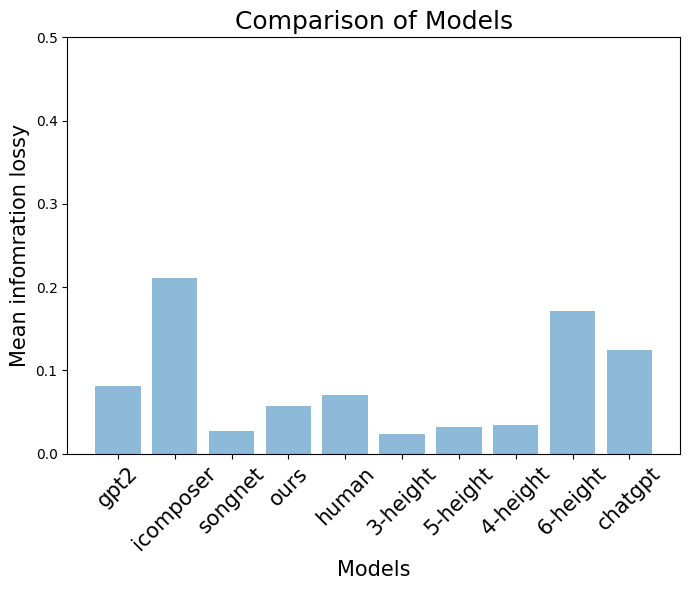

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the model names and scores
models = list(model_score.keys())
scores = [np.mean(model_score[model]) for model in models]

# Create a bar chart
fig, ax = plt.subplots(figsize=(7, 6))
x_pos = np.arange(len(models))

ax.bar(x_pos, scores, align='center', alpha=0.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45,fontsize=15)
ax.set_xlabel('Models',fontsize=15)
ax.set_ylabel('Mean infomration lossy',fontsize=15)
ax.set_title('Comparison of Models',fontsize=18)

# Set the y-axis limits
ax.set_ylim(0, 0.5)  # Replace 0.5 with your desired upper limit


plt.tight_layout()
plt.show()

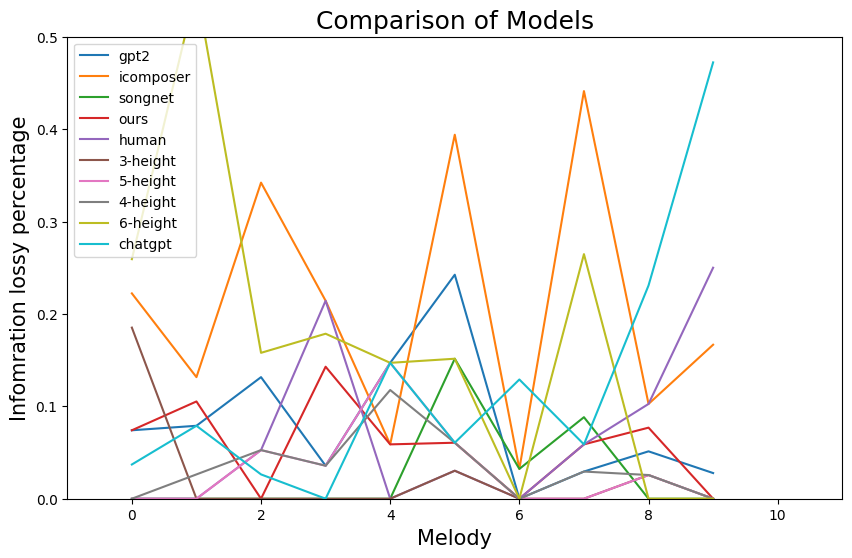

In [43]:
import matplotlib.pyplot as plt

# Specify the width and height for your figure (in inches)
figure_width = 10  # Adjust as needed
figure_height = 6  # Adjust as needed

# Create the main figure with the specified size
plt.figure(figsize=(figure_width, figure_height))

# Create a subplot within the main figure
ax = plt.gca()

# Plot each data series
for key, values in model_score.items():
    ax.plot(values, label=key)


# Add labels and legend
ax.set_xlabel('Melody',fontsize=15)
ax.set_ylabel('Infomration lossy percentage',fontsize=15)
ax.set_title('Comparison of Models',fontsize=18)

ax.legend()

# Expand the x-axis
ax.set_xlim(-1, len(values) +1)
# Set the y-axis limits
ax.set_ylim(0, 0.5)  # Replace 0.5 with your desired upper limit


# Show the plot
plt.show()


In [42]:
def information_lossy(sent1, sent2):
    sent1, sent2 = sent1.replace("/", ""), sent2.replace("/", "")
    if len(sent1) != len(sent2):
        print(sent1)
        print(sent2)
        raise ValueError("Input sentences must have the same length")
    
    score = 0
    # Remove punctuations
    
    
    for i in range(len(sent1)):
        char1, char2 = sent1[i], sent2[i]
        if char1 != char2:
            score += 1
    
    return score / len(sent1)


In [46]:
def information_correctness(sent1, sent2):
    sent1, sent2 = sent1.replace("/", ""), sent2.replace("/", "")
    if len(sent1) != len(sent2):
        print(sent1,sent2)
        raise ValueError("Input sentences must have the same length")
    
    score = 0
    # Remove punctuations
    
    
    for i in range(len(sent1)):
        char1, char2 = sent1[i], sent2[i]
        if char1 == char2:
            score += 1
    
    return score / len(sent1)


In [110]:
question_id_score

{2: {'2第二组第一首理解度': 4,
  '2第二组第一首自然度': 4,
  '2第二组第一首理解度2': 4,
  '2第二组第一首词曲匹配度': 3,
  '2第二组第一首画面感': 4,
  '2第二组第二首理解度': 4,
  '2第二组第二首自然度': 3,
  '2第二组第二首理解度2': 4,
  '2第二组第二首词曲匹配度': 3,
  '2第二组第二首画面感': 3,
  '2第二组第三首理解度': 4,
  '2第二组第三首自然度': 3,
  '2第二组第三首理解度2': 4,
  '2第二组第三首词曲匹配度': 3,
  '2第二组第三首画面感': 3,
  '2第二组第四首理解度': 4,
  '2第二组第四首自然度': 3,
  '2第二组第四首理解度2': 3,
  '2第二组第四首词曲匹配度': 3,
  '2第二组第四首画面感': 3,
  '2第二组第五首理解度': 4,
  '2第二组第五首自然度': 3,
  '2第二组第五首理解度2': 4,
  '2第二组第五首词曲匹配度': 3,
  '2第二组第五首画面感': 3,
  '2第二组第六首理解度': 4,
  '2第二组第六首自然度': 3,
  '2第二组第六首理解度2': 4,
  '2第二组第六首词曲匹配度': 3,
  '2第二组第六首画面感': 4,
  '2第二组第七首理解度': 4,
  '2第二组第七首自然度': 4,
  '2第二组第七首理解度2': 4,
  '2第二组第七首词曲匹配度': 4,
  '2第二组第七首画面感': 4,
  '2第二组第八首理解度': 4,
  '2第二组第八首自然度': 4,
  '2第二组第八首理解度2': 4,
  '2第二组第八首词曲匹配度': 4,
  '2第二组第八首画面感': 4,
  '2第二组第九首理解度': 3,
  '2第二组第九首自然度': 3,
  '2第二组第九首理解度2': 3,
  '2第二组第九首词曲匹配度': 3,
  '2第二组第九首画面感': 3,
  '2第二组第十首理解度': 3,
  '2第二组第十首自然度': 3,
  '2第二组第十首理解度2': 3,
  '2第二组第十首词曲匹配度': 4,
  '2第二组第十首画面感': 3,
  '2请问你的年龄是？': 3,

In [129]:
# Reverse the keys and values
reversed_mapping = {value: key for key, value in mapping.items()}

In [118]:
# {"gpt2":{"理解度":{0:[],1:[],...,9:[]},"icomposer":...}
dimension_melody = {key: dict() for key in internal_dimension}
for k in dimension_melody.keys():
    dimension_melody[k] = {key: list() for key in range(10)}
    
system_dim_melody =  {key: dimension_melody for key in systems_1}



In [119]:
system_dim_melody

{'gpt2': {'理解度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '自然度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '理解度2': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '词曲匹配度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '画面感': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []}},
 'icomposer': {'理解度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '自然度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '理解度2': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},
  '词曲匹配度': {0: [],
   1: [],
   2: [],
   3: [],
   4: [],
   5: [],
   6: [],
   7: [],
   8: [],
   9: []},


In [201]:
for idx, question in question_id_score.items():
    for ques, score in question.items():
        melody = ques[1:7]
        if melody == "请问你的年龄":
            pass
        elif melody == "请问你已完成":
            pass
        else:
            for dim in internal_dimension:
                if dim == ques[8::]:
                    system = dataset_dict[melody]
                    try:

                        system_dim_melody[system][dim][int(reversed_mapping[melody[4]])-1].append(score)
                    except KeyError:
                        print(reversed_mapping[ques[4]])

In [211]:
question_id_score

{2: {'2第二组第一首理解度': 4,
  '2第二组第一首自然度': 4,
  '2第二组第一首理解度2': 4,
  '2第二组第一首词曲匹配度': 3,
  '2第二组第一首画面感': 4,
  '2第二组第二首理解度': 4,
  '2第二组第二首自然度': 3,
  '2第二组第二首理解度2': 4,
  '2第二组第二首词曲匹配度': 3,
  '2第二组第二首画面感': 3,
  '2第二组第三首理解度': 4,
  '2第二组第三首自然度': 3,
  '2第二组第三首理解度2': 4,
  '2第二组第三首词曲匹配度': 3,
  '2第二组第三首画面感': 3,
  '2第二组第四首理解度': 4,
  '2第二组第四首自然度': 3,
  '2第二组第四首理解度2': 3,
  '2第二组第四首词曲匹配度': 3,
  '2第二组第四首画面感': 3,
  '2第二组第五首理解度': 4,
  '2第二组第五首自然度': 3,
  '2第二组第五首理解度2': 4,
  '2第二组第五首词曲匹配度': 3,
  '2第二组第五首画面感': 3,
  '2第二组第六首理解度': 4,
  '2第二组第六首自然度': 3,
  '2第二组第六首理解度2': 4,
  '2第二组第六首词曲匹配度': 3,
  '2第二组第六首画面感': 4,
  '2第二组第七首理解度': 4,
  '2第二组第七首自然度': 4,
  '2第二组第七首理解度2': 4,
  '2第二组第七首词曲匹配度': 4,
  '2第二组第七首画面感': 4,
  '2第二组第八首理解度': 4,
  '2第二组第八首自然度': 4,
  '2第二组第八首理解度2': 4,
  '2第二组第八首词曲匹配度': 4,
  '2第二组第八首画面感': 4,
  '2第二组第九首理解度': 3,
  '2第二组第九首自然度': 3,
  '2第二组第九首理解度2': 3,
  '2第二组第九首词曲匹配度': 3,
  '2第二组第九首画面感': 3,
  '2第二组第十首理解度': 3,
  '2第二组第十首自然度': 3,
  '2第二组第十首理解度2': 3,
  '2第二组第十首词曲匹配度': 4,
  '2第二组第十首画面感': 3,
  '2请问你的年龄是？': 3,

In [207]:
system

'human'

In [202]:
system_dim_melody

{'gpt2': {'理解度': {0: [4,
    4,
    4,
    3,
    4,
    4,
    4,
    4,
    4,
    4,
    5,
    3,
    5,
    4,
    4,
    4,
    4,
    5,
    4,
    3,
    2,
    3,
    2,
    3,
    2,
    4,
    2,
    3,
    2,
    3,
    4,
    3,
    3,
    4,
    2,
    4,
    3,
    4,
    3,
    5,
    3,
    3,
    3,
    4,
    3,
    4,
    3,
    4,
    4,
    5,
    3,
    4,
    2,
    4,
    2,
    4,
    5,
    5,
    4,
    4,
    5,
    3,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    3,
    3,
    3,
    2,
    3,
    2,
    4,
    3,
    3,
    2,
    2,
    2,
    3,
    2,
    3,
    3,
    5,
    4,
    5,
    4,
    3,
    4,
    5,
    5,
    5,
    5,
    2,
    3,
    4,
    3,
    4,
    5,
    4,
    5,
    4,
    3,
    2,
    2,
    4,
    3,
    2,
    4,
    3,
    5,
    3,
    3,
    3,
    3,
    4,
    2,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    4,
    3,
    4,
    2,
    4,
    4,
    3,
    5,
    3,
    3,
  

In [186]:
melody_score[0] == melody_score[1]

False

In [235]:
question_id_score

{2: {'2第二组第一首理解度': 4,
  '2第二组第一首自然度': 4,
  '2第二组第一首理解度2': 4,
  '2第二组第一首词曲匹配度': 3,
  '2第二组第一首画面感': 4,
  '2第二组第二首理解度': 4,
  '2第二组第二首自然度': 3,
  '2第二组第二首理解度2': 4,
  '2第二组第二首词曲匹配度': 3,
  '2第二组第二首画面感': 3,
  '2第二组第三首理解度': 4,
  '2第二组第三首自然度': 3,
  '2第二组第三首理解度2': 4,
  '2第二组第三首词曲匹配度': 3,
  '2第二组第三首画面感': 3,
  '2第二组第四首理解度': 4,
  '2第二组第四首自然度': 3,
  '2第二组第四首理解度2': 3,
  '2第二组第四首词曲匹配度': 3,
  '2第二组第四首画面感': 3,
  '2第二组第五首理解度': 4,
  '2第二组第五首自然度': 3,
  '2第二组第五首理解度2': 4,
  '2第二组第五首词曲匹配度': 3,
  '2第二组第五首画面感': 3,
  '2第二组第六首理解度': 4,
  '2第二组第六首自然度': 3,
  '2第二组第六首理解度2': 4,
  '2第二组第六首词曲匹配度': 3,
  '2第二组第六首画面感': 4,
  '2第二组第七首理解度': 4,
  '2第二组第七首自然度': 4,
  '2第二组第七首理解度2': 4,
  '2第二组第七首词曲匹配度': 4,
  '2第二组第七首画面感': 4,
  '2第二组第八首理解度': 4,
  '2第二组第八首自然度': 4,
  '2第二组第八首理解度2': 4,
  '2第二组第八首词曲匹配度': 4,
  '2第二组第八首画面感': 4,
  '2第二组第九首理解度': 3,
  '2第二组第九首自然度': 3,
  '2第二组第九首理解度2': 3,
  '2第二组第九首词曲匹配度': 3,
  '2第二组第九首画面感': 3,
  '2第二组第十首理解度': 3,
  '2第二组第十首自然度': 3,
  '2第二组第十首理解度2': 3,
  '2第二组第十首词曲匹配度': 4,
  '2第二组第十首画面感': 3,
  '2请问你的年龄是？': 3,

In [330]:
system_melody_score = dict()

for participant_idx, ques_score in question_id_score.items():
    for ques, score in ques_score.items():
        if "请问你的年龄" in ques:
            pass
        elif "请问你已完成" in ques:
            pass
        else:
            group = dataset_dict[ques[1:7]]
            if group not in system_melody_score.keys():
                system_melody_score[group] = dict()
            dim = ques[7:]
            if dim not in system_melody_score[group].keys():
                system_melody_score[group][dim] = dict()
            song_idx = reversed_mapping[ques[5]]
            if int(song_idx) not in system_melody_score[group][dim].keys():
                system_melody_score[group][dim][int(song_idx)] = list()
            
            system_melody_score[group][dim][int(song_idx)].append(score)
            
            


In [333]:
system_melody_score_mean = dict()

for system, dim_melody_score in system_melody_score.items():
    system_melody_score_mean[system] = dict()
    for dim, melody_score in dim_melody_score.items():
        system_melody_score_mean[system][dim] = list()
        for melody, score in melody_score.items():
            system_melody_score_mean[system][dim].append(sum(score)/len(score))

In [334]:
system_melody_score_mean

{'icomposer': {'理解度': [2.71875,
   2.90625,
   3.1333333333333333,
   2.7777777777777777,
   3.3125,
   3.1875,
   3.8055555555555554,
   2.2222222222222223,
   2.4444444444444446,
   2.9444444444444446],
  '自然度': [3.25,
   2.9375,
   3.2222222222222223,
   2.7777777777777777,
   3.4375,
   3.5625,
   3.611111111111111,
   2.75,
   2.638888888888889,
   3.0277777777777777],
  '理解度2': [2.96875,
   2.78125,
   3.1777777777777776,
   2.7555555555555555,
   3.0,
   2.9375,
   3.5833333333333335,
   2.4444444444444446,
   2.8333333333333335,
   3.5],
  '词曲匹配度': [3.34375,
   3.03125,
   3.2444444444444445,
   2.8444444444444446,
   3.375,
   3.0,
   3.3333333333333335,
   2.6944444444444446,
   2.861111111111111,
   3.0833333333333335],
  '画面感': [2.71875,
   2.5625,
   2.466666666666667,
   2.311111111111111,
   2.5625,
   2.5,
   2.4722222222222223,
   1.8888888888888888,
   2.2777777777777777,
   2.8333333333333335]},
 'songnet': {'理解度': [3.65625,
   3.9375,
   3.8444444444444446,
   4.066

In [350]:
for k,v in model_score.items():
    dim = "理解度"
    pear_correlation = np.corrcoef(system_melody_score_mean[k][dim], model_score_correct[k])[0, 1]
    spear_correlation, _ = spearmanr(system_melody_score_mean[k][dim], model_score_correct[k])
    print(k,dim, pear_correlation,spear_correlation)


gpt2 理解度 -0.6994929122446657 -0.7538028741632801
icomposer 理解度 0.44252780581582235 0.43030303030303024
songnet 理解度 -0.31704119869718217 -0.4399433835235439
ours 理解度 0.15370420226576598 0.08000946913656627
human 理解度 0.022228743250769293 -0.08493254095435152


In [351]:
system_melody_score_mean

{'icomposer': {'理解度': [2.71875,
   2.90625,
   3.1333333333333333,
   2.7777777777777777,
   3.3125,
   3.1875,
   3.8055555555555554,
   2.2222222222222223,
   2.4444444444444446,
   2.9444444444444446],
  '自然度': [3.25,
   2.9375,
   3.2222222222222223,
   2.7777777777777777,
   3.4375,
   3.5625,
   3.611111111111111,
   2.75,
   2.638888888888889,
   3.0277777777777777],
  '理解度2': [2.96875,
   2.78125,
   3.1777777777777776,
   2.7555555555555555,
   3.0,
   2.9375,
   3.5833333333333335,
   2.4444444444444446,
   2.8333333333333335,
   3.5],
  '词曲匹配度': [3.34375,
   3.03125,
   3.2444444444444445,
   2.8444444444444446,
   3.375,
   3.0,
   3.3333333333333335,
   2.6944444444444446,
   2.861111111111111,
   3.0833333333333335],
  '画面感': [2.71875,
   2.5625,
   2.466666666666667,
   2.311111111111111,
   2.5625,
   2.5,
   2.4722222222222223,
   1.8888888888888888,
   2.2777777777777777,
   2.8333333333333335]},
 'songnet': {'理解度': [3.65625,
   3.9375,
   3.8444444444444446,
   4.066

In [353]:
dimensions

dict_keys(['理解度', '自然度', '理解度2', '词曲匹配度', '画面感'])

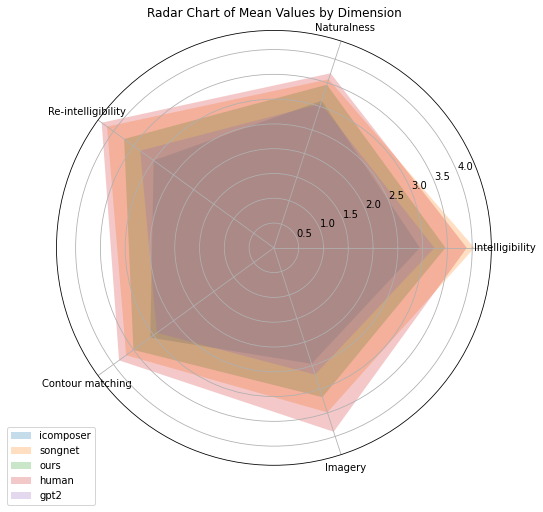

In [355]:
import numpy as np
import matplotlib.pyplot as plt

d = system_melody_score_mean
# Define the dimensions and systems
dimensions = list(d.values())[0].keys()
systems = list(d.keys())

eng_dimensions = ["Intelligibility", "Naturalness","Re-intelligibility","Contour matching","Imagery"]

# Calculate the mean values for each dimension and system
mean_values = {system: [np.mean(d[system][dim]) for dim in dimensions] for system in systems}

# Convert the mean values to a numpy array
mean_array = np.array([mean_values[system] for system in systems])

# Normalize the data for better visualization
# min_val = np.min(mean_array)
# max_val = np.max(mean_array)
# normalized_data = (mean_array - min_val) / (max_val - min_val)

# Number of dimensions
num_dimensions = len(dimensions)

# Create a list of angles for the radar chart
angles = [n / float(num_dimensions) * 2 * np.pi for n in range(num_dimensions)]
angles += angles[:1]

# Create a radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, system in enumerate(systems):
#     values = normalized_data[i]
    values = mean_array[i]
    values = np.concatenate((values, [values[0]]))  # Close the loop
    ax.fill(angles, values, alpha=0.25, label=system)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(eng_dimensions)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of Mean Values by Dimension')
plt.show()


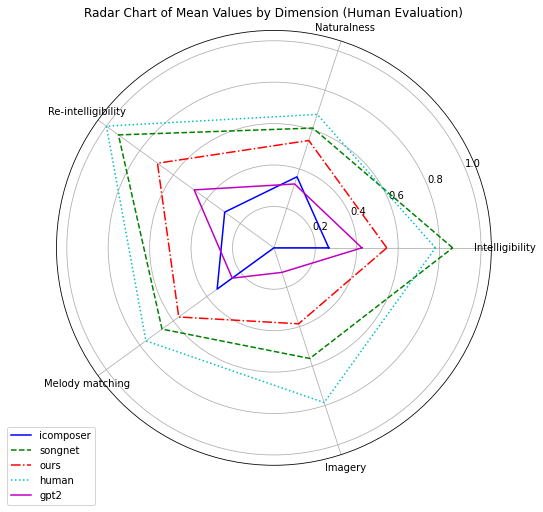

In [367]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each system
colors = {
    'icomposer': 'b',
    'songnet': 'g',
    'ours': 'r',
    'human': 'c',
    'gpt2': 'm',
}

# Define line styles for each system
line_styles = {
    'icomposer': '-',
    'songnet': '--',
    'ours': '-.',
    'human': ':',
    'gpt2': '-',
}


d = system_melody_score_mean
# Define the dimensions and systems
dimensions = list(d.values())[0].keys()
systems = list(d.keys())

eng_dimensions = ["Intelligibility", "Naturalness","Re-intelligibility","Melody matching","Imagery"]

# Calculate the mean values for each dimension and system
mean_values = {system: [np.mean(d[system][dim]) for dim in dimensions] for system in systems}

# Convert the mean values to a numpy array
mean_array = np.array([mean_values[system] for system in systems])

# Normalize the data for better visualization
min_val = np.min(mean_array)
max_val = np.max(mean_array)
normalized_data = (mean_array - min_val) / (max_val - min_val)

# Number of dimensions
num_dimensions = len(dimensions)

# Create a list of angles for the radar chart
angles = [n / float(num_dimensions) * 2 * np.pi for n in range(num_dimensions)]
angles += angles[:1]

# Create a radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, system in enumerate(systems):
    values = normalized_data[i]
    values = np.concatenate((values, [values[0]]))  # Close the loop
#     ax.fill(angles, values, alpha=0.25, label=system)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(eng_dimensions)
    ax.plot(angles, values, label=system, color=colors[system], linestyle=line_styles[system])

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of Mean Values by Dimension (Human Evaluation)')
plt.show()


In [359]:
for system, dim_score in system_melody_score_mean.items():
    for dim, scores in dim_score.items():
        print(system,dim, sum(scores)/len(scores))


icomposer 理解度 2.9452777777777777
icomposer 自然度 3.1215277777777777
icomposer 理解度2 2.998194444444444
icomposer 词曲匹配度 3.081111111111111
icomposer 画面感 2.459375
songnet 理解度 4.043541666666667
songnet 自然度 3.575625
songnet 理解度2 4.162083333333333
songnet 词曲匹配度 3.684791666666667
songnet 画面感 3.490347222222222
ours 理解度 3.4596527777777775
ours 自然度 3.459791666666667
ours 理解度2 3.7349305555555548
ours 词曲匹配度 3.5017361111111107
ours 画面感 3.1671527777777775
human 理解度 3.891111111111111
human 自然度 3.702569444444444
human 理解度2 4.294583333333334
human 词曲匹配度 3.8613888888888885
human 画面感 3.9010416666666665
gpt2 理解度 3.2388888888888894
gpt2 自然度 3.0543749999999994
gpt2 理解度2 3.3331250000000003
gpt2 词曲匹配度 2.9159027777777777
gpt2 画面感 2.688194444444444


In [261]:
# Create an empty dictionary to store the final structured data
final_data = {}

# Iterate through each participant's data
for participant_idx, participant_scores in question_id_score.items():
    for ques, value in participant_scores.items():
        text_label = ques[1:7]
#         print(text_label, value)
        # Initialize variables to store system, dimension, and song information
        system = None
        dimension = None
        song = None
        
        # Iterate through each system label and extract the system information
        for system_label, system_name in dataset_dict.items():
            if system_label in text_label:
                system = system_name
                break
        
        # Iterate through each dimension and extract the dimension information
        for dim in internal_dimension:
            
            if dim in ques:
                dimension = dim
                break
        
        # Extract the song information
        if system and dimension:
            song = text_label.replace(system, '').replace(dimension, '').strip()
        
        # Create the final data structure
        if system and dimension and song:
            print(system , dimension , song)
            if system not in final_data:
                final_data[system] = {}
            if dimension not in final_data[system]:
                final_data[system][dimension] = {}
            if song not in final_data[system][dimension]:
                final_data[system][dimension][song] = []
            final_data[system][dimension][song].append(value)

# Now, final_data contains the structured data as you described


icomposer 理解度 第二组第一首
icomposer 自然度 第二组第一首
icomposer 理解度 第二组第一首
icomposer 词曲匹配度 第二组第一首
icomposer 画面感 第二组第一首
icomposer 理解度 第二组第二首
icomposer 自然度 第二组第二首
icomposer 理解度 第二组第二首
icomposer 词曲匹配度 第二组第二首
icomposer 画面感 第二组第二首
songnet 理解度 第二组第三首
songnet 自然度 第二组第三首
songnet 理解度 第二组第三首
songnet 词曲匹配度 第二组第三首
songnet 画面感 第二组第三首
songnet 理解度 第二组第四首
songnet 自然度 第二组第四首
songnet 理解度 第二组第四首
songnet 词曲匹配度 第二组第四首
songnet 画面感 第二组第四首
ours 理解度 第二组第五首
ours 自然度 第二组第五首
ours 理解度 第二组第五首
ours 词曲匹配度 第二组第五首
ours 画面感 第二组第五首
ours 理解度 第二组第六首
ours 自然度 第二组第六首
ours 理解度 第二组第六首
ours 词曲匹配度 第二组第六首
ours 画面感 第二组第六首
human 理解度 第二组第七首
human 自然度 第二组第七首
human 理解度 第二组第七首
human 词曲匹配度 第二组第七首
human 画面感 第二组第七首
human 理解度 第二组第八首
human 自然度 第二组第八首
human 理解度 第二组第八首
human 词曲匹配度 第二组第八首
human 画面感 第二组第八首
gpt2 理解度 第二组第九首
gpt2 自然度 第二组第九首
gpt2 理解度 第二组第九首
gpt2 词曲匹配度 第二组第九首
gpt2 画面感 第二组第九首
gpt2 理解度 第二组第十首
gpt2 自然度 第二组第十首
gpt2 理解度 第二组第十首
gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首
songnet 词曲匹配度 第三组第一首
songnet 画面感 

songnet 理解度 第二组第四首
songnet 自然度 第二组第四首
songnet 理解度 第二组第四首
songnet 词曲匹配度 第二组第四首
songnet 画面感 第二组第四首
ours 理解度 第二组第五首
ours 自然度 第二组第五首
ours 理解度 第二组第五首
ours 词曲匹配度 第二组第五首
ours 画面感 第二组第五首
ours 理解度 第二组第六首
ours 自然度 第二组第六首
ours 理解度 第二组第六首
ours 词曲匹配度 第二组第六首
ours 画面感 第二组第六首
human 理解度 第二组第七首
human 自然度 第二组第七首
human 理解度 第二组第七首
human 词曲匹配度 第二组第七首
human 画面感 第二组第七首
human 理解度 第二组第八首
human 自然度 第二组第八首
human 理解度 第二组第八首
human 词曲匹配度 第二组第八首
human 画面感 第二组第八首
gpt2 理解度 第二组第九首
gpt2 自然度 第二组第九首
gpt2 理解度 第二组第九首
gpt2 词曲匹配度 第二组第九首
gpt2 画面感 第二组第九首
gpt2 理解度 第二组第十首
gpt2 自然度 第二组第十首
gpt2 理解度 第二组第十首
gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首
songnet 词曲匹配度 第三组第一首
songnet 画面感 第三组第一首
songnet 理解度 第三组第二首
songnet 自然度 第三组第二首
songnet 理解度 第三组第二首
songnet 词曲匹配度 第三组第二首
songnet 画面感 第三组第二首
ours 理解度 第三组第三首
ours 自然度 第三组第三首
ours 理解度 第三组第三首
ours 词曲匹配度 第三组第三首
ours 画面感 第三组第三首
ours 理解度 第三组第四首
ours 自然度 第三组第四首
ours 理解度 第三组第四首
ours 词曲匹配度 第三组第四首
ours 画面感 第三组第四首
human 理解度 第三组第五首
human 自然度 第三组第五首
human 理解度

songnet 词曲匹配度 第四组第十首
songnet 画面感 第四组第十首
human 理解度 第五组第一首
human 自然度 第五组第一首
human 理解度 第五组第一首
human 词曲匹配度 第五组第一首
human 画面感 第五组第一首
human 理解度 第五组第二首
human 自然度 第五组第二首
human 理解度 第五组第二首
human 词曲匹配度 第五组第二首
human 画面感 第五组第二首
gpt2 理解度 第五组第三首
gpt2 自然度 第五组第三首
gpt2 理解度 第五组第三首
gpt2 词曲匹配度 第五组第三首
gpt2 画面感 第五组第三首
gpt2 理解度 第五组第四首
gpt2 自然度 第五组第四首
gpt2 理解度 第五组第四首
gpt2 词曲匹配度 第五组第四首
gpt2 画面感 第五组第四首
icomposer 理解度 第五组第五首
icomposer 自然度 第五组第五首
icomposer 理解度 第五组第五首
icomposer 词曲匹配度 第五组第五首
icomposer 画面感 第五组第五首
icomposer 理解度 第五组第六首
icomposer 自然度 第五组第六首
icomposer 理解度 第五组第六首
icomposer 词曲匹配度 第五组第六首
icomposer 画面感 第五组第六首
songnet 理解度 第五组第七首
songnet 自然度 第五组第七首
songnet 理解度 第五组第七首
songnet 词曲匹配度 第五组第七首
songnet 画面感 第五组第七首
songnet 理解度 第五组第八首
songnet 自然度 第五组第八首
songnet 理解度 第五组第八首
songnet 词曲匹配度 第五组第八首
songnet 画面感 第五组第八首
ours 理解度 第五组第九首
ours 自然度 第五组第九首
ours 理解度 第五组第九首
ours 词曲匹配度 第五组第九首
ours 画面感 第五组第九首
ours 理解度 第五组第十首
ours 自然度 第五组第十首
ours 理解度 第五组第十首
ours 词曲匹配度 第五组第十首
ours 画面感 第五组第十首
human 理解度 第五组第一首
human 自然度 第五组第一首
human 理解度 第五组第一首

songnet 词曲匹配度 第四组第十首
songnet 画面感 第四组第十首
ours 理解度 第四组第一首
ours 自然度 第四组第一首
ours 理解度 第四组第一首
ours 词曲匹配度 第四组第一首
ours 画面感 第四组第一首
ours 理解度 第四组第二首
ours 自然度 第四组第二首
ours 理解度 第四组第二首
ours 词曲匹配度 第四组第二首
ours 画面感 第四组第二首
human 理解度 第四组第三首
human 自然度 第四组第三首
human 理解度 第四组第三首
human 词曲匹配度 第四组第三首
human 画面感 第四组第三首
human 理解度 第四组第四首
human 自然度 第四组第四首
human 理解度 第四组第四首
human 词曲匹配度 第四组第四首
human 画面感 第四组第四首
gpt2 理解度 第四组第五首
gpt2 自然度 第四组第五首
gpt2 理解度 第四组第五首
gpt2 词曲匹配度 第四组第五首
gpt2 画面感 第四组第五首
gpt2 理解度 第四组第六首
gpt2 自然度 第四组第六首
gpt2 理解度 第四组第六首
gpt2 词曲匹配度 第四组第六首
gpt2 画面感 第四组第六首
icomposer 理解度 第四组第七首
icomposer 自然度 第四组第七首
icomposer 理解度 第四组第七首
icomposer 词曲匹配度 第四组第七首
icomposer 画面感 第四组第七首
icomposer 理解度 第四组第八首
icomposer 自然度 第四组第八首
icomposer 理解度 第四组第八首
icomposer 词曲匹配度 第四组第八首
icomposer 画面感 第四组第八首
songnet 理解度 第四组第九首
songnet 自然度 第四组第九首
songnet 理解度 第四组第九首
songnet 词曲匹配度 第四组第九首
songnet 画面感 第四组第九首
songnet 理解度 第四组第十首
songnet 自然度 第四组第十首
songnet 理解度 第四组第十首
songnet 词曲匹配度 第四组第十首
songnet 画面感 第四组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 

ours 词曲匹配度 第五组第十首
ours 画面感 第五组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首
songnet 词曲匹配度 第三组第一首
songnet 画面感 第三组第一首
songnet 理解度 第三组第二首
songnet 自然度 第三组第二首
songnet 理解度 第三组第二首
songnet 词曲匹配度 第三组第二首
songnet 画面感 第三组第二首
ours 理解度 第三组第三首
ours 自然度 第三组第三首
ours 理解度 第三组第三首
ours 词曲匹配度 第三组第三首
ours 画面感 第三组第三首
ours 理解度 第三组第四首
ours 自然度 第三组第四首
ours 理解度 第三组第四首
ours 词曲匹配度 第三组第四首
ours 画面感 第三组第四首
human 理解度 第三组第五首
human 自然度 第三组第五首
human 理解度 第三组第五首
human 词曲匹配度 第三组第五首
human 画面感 第三组第五首
human 理解度 第三组第六首
human 自然度 第三组第六首
human 理解度 第三组第六首
human 词曲匹配度 第三组第六首
human 画面感 第三组第六首
gpt2 理解度 第三组第七首
gpt2 自然度 第三组第七首
gpt2 理解度 第三组第七首
gpt2 词曲匹配度 第三组第七首
gpt2 画面感 第三组第七首
gpt2 理解度 第三组第八首
gpt2 自然度 第三组第八首
gpt2 理解度 第三组第八首
gpt2 词曲匹配度 第三组第八首
gpt2 画面感 第三组第八首
icomposer 理解度 第三组第九首
icomposer 自然度 第三组第九首
icomposer 理解度 第三组第九首
icomposer 词曲匹配度 第三组第九首
icomposer 画面感 第三组第九首
icomposer 理解度 第三组第十首
icomposer 自然度 第三组第十首
icomposer 理解度 第三组第十首
icomposer 词曲匹配度 第三组第十首
icomposer 画面感 第三组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首

gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首
songnet 词曲匹配度 第三组第一首
songnet 画面感 第三组第一首
songnet 理解度 第三组第二首
songnet 自然度 第三组第二首
songnet 理解度 第三组第二首
songnet 词曲匹配度 第三组第二首
songnet 画面感 第三组第二首
ours 理解度 第三组第三首
ours 自然度 第三组第三首
ours 理解度 第三组第三首
ours 词曲匹配度 第三组第三首
ours 画面感 第三组第三首
ours 理解度 第三组第四首
ours 自然度 第三组第四首
ours 理解度 第三组第四首
ours 词曲匹配度 第三组第四首
ours 画面感 第三组第四首
human 理解度 第三组第五首
human 自然度 第三组第五首
human 理解度 第三组第五首
human 词曲匹配度 第三组第五首
human 画面感 第三组第五首
human 理解度 第三组第六首
human 自然度 第三组第六首
human 理解度 第三组第六首
human 词曲匹配度 第三组第六首
human 画面感 第三组第六首
gpt2 理解度 第三组第七首
gpt2 自然度 第三组第七首
gpt2 理解度 第三组第七首
gpt2 词曲匹配度 第三组第七首
gpt2 画面感 第三组第七首
gpt2 理解度 第三组第八首
gpt2 自然度 第三组第八首
gpt2 理解度 第三组第八首
gpt2 词曲匹配度 第三组第八首
gpt2 画面感 第三组第八首
icomposer 理解度 第三组第九首
icomposer 自然度 第三组第九首
icomposer 理解度 第三组第九首
icomposer 词曲匹配度 第三组第九首
icomposer 画面感 第三组第九首
icomposer 理解度 第三组第十首
icomposer 自然度 第三组第十首
icomposer 理解度 第三组第十首
icomposer 词曲匹配度 第三组第十首
icomposer 画面感 第三组第十首
icomposer 理解度 第二组第一首
icomposer 自然度 第二组第一首
icomposer 理解度 

gpt2 理解度 第二组第十首
gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首
songnet 理解度 第三组第一首
songnet 词曲匹配度 第三组第一首
songnet 画面感 第三组第一首
songnet 理解度 第三组第二首
songnet 自然度 第三组第二首
songnet 理解度 第三组第二首
songnet 词曲匹配度 第三组第二首
songnet 画面感 第三组第二首
ours 理解度 第三组第三首
ours 自然度 第三组第三首
ours 理解度 第三组第三首
ours 词曲匹配度 第三组第三首
ours 画面感 第三组第三首
ours 理解度 第三组第四首
ours 自然度 第三组第四首
ours 理解度 第三组第四首
ours 词曲匹配度 第三组第四首
ours 画面感 第三组第四首
human 理解度 第三组第五首
human 自然度 第三组第五首
human 理解度 第三组第五首
human 词曲匹配度 第三组第五首
human 画面感 第三组第五首
human 理解度 第三组第六首
human 自然度 第三组第六首
human 理解度 第三组第六首
human 词曲匹配度 第三组第六首
human 画面感 第三组第六首
gpt2 理解度 第三组第七首
gpt2 自然度 第三组第七首
gpt2 理解度 第三组第七首
gpt2 词曲匹配度 第三组第七首
gpt2 画面感 第三组第七首
gpt2 理解度 第三组第八首
gpt2 自然度 第三组第八首
gpt2 理解度 第三组第八首
gpt2 词曲匹配度 第三组第八首
gpt2 画面感 第三组第八首
icomposer 理解度 第三组第九首
icomposer 自然度 第三组第九首
icomposer 理解度 第三组第九首
icomposer 词曲匹配度 第三组第九首
icomposer 画面感 第三组第九首
icomposer 理解度 第三组第十首
icomposer 自然度 第三组第十首
icomposer 理解度 第三组第十首
icomposer 词曲匹配度 第三组第十首
icomposer 画面感 第三组第十首
ours 理解度 第四组第一首
ours 自然度 第四组第一首
ours 理解度

human 理解度 第一组第十首
human 词曲匹配度 第一组第十首
human 画面感 第一组第十首
icomposer 理解度 第二组第一首
icomposer 自然度 第二组第一首
icomposer 理解度 第二组第一首
icomposer 词曲匹配度 第二组第一首
icomposer 画面感 第二组第一首
icomposer 理解度 第二组第二首
icomposer 自然度 第二组第二首
icomposer 理解度 第二组第二首
icomposer 词曲匹配度 第二组第二首
icomposer 画面感 第二组第二首
songnet 理解度 第二组第三首
songnet 自然度 第二组第三首
songnet 理解度 第二组第三首
songnet 词曲匹配度 第二组第三首
songnet 画面感 第二组第三首
songnet 理解度 第二组第四首
songnet 自然度 第二组第四首
songnet 理解度 第二组第四首
songnet 词曲匹配度 第二组第四首
songnet 画面感 第二组第四首
ours 理解度 第二组第五首
ours 自然度 第二组第五首
ours 理解度 第二组第五首
ours 词曲匹配度 第二组第五首
ours 画面感 第二组第五首
ours 理解度 第二组第六首
ours 自然度 第二组第六首
ours 理解度 第二组第六首
ours 词曲匹配度 第二组第六首
ours 画面感 第二组第六首
human 理解度 第二组第七首
human 自然度 第二组第七首
human 理解度 第二组第七首
human 词曲匹配度 第二组第七首
human 画面感 第二组第七首
human 理解度 第二组第八首
human 自然度 第二组第八首
human 理解度 第二组第八首
human 词曲匹配度 第二组第八首
human 画面感 第二组第八首
gpt2 理解度 第二组第九首
gpt2 自然度 第二组第九首
gpt2 理解度 第二组第九首
gpt2 词曲匹配度 第二组第九首
gpt2 画面感 第二组第九首
gpt2 理解度 第二组第十首
gpt2 自然度 第二组第十首
gpt2 理解度 第二组第十首
gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
gpt2 理解度 第一组第一首
gpt2 自然度 第一组第一首
gpt2 

human 理解度 第一组第十首
human 词曲匹配度 第一组第十首
human 画面感 第一组第十首
icomposer 理解度 第二组第一首
icomposer 自然度 第二组第一首
icomposer 理解度 第二组第一首
icomposer 词曲匹配度 第二组第一首
icomposer 画面感 第二组第一首
icomposer 理解度 第二组第二首
icomposer 自然度 第二组第二首
icomposer 理解度 第二组第二首
icomposer 词曲匹配度 第二组第二首
icomposer 画面感 第二组第二首
songnet 理解度 第二组第三首
songnet 自然度 第二组第三首
songnet 理解度 第二组第三首
songnet 词曲匹配度 第二组第三首
songnet 画面感 第二组第三首
songnet 理解度 第二组第四首
songnet 自然度 第二组第四首
songnet 理解度 第二组第四首
songnet 词曲匹配度 第二组第四首
songnet 画面感 第二组第四首
ours 理解度 第二组第五首
ours 自然度 第二组第五首
ours 理解度 第二组第五首
ours 词曲匹配度 第二组第五首
ours 画面感 第二组第五首
ours 理解度 第二组第六首
ours 自然度 第二组第六首
ours 理解度 第二组第六首
ours 词曲匹配度 第二组第六首
ours 画面感 第二组第六首
human 理解度 第二组第七首
human 自然度 第二组第七首
human 理解度 第二组第七首
human 词曲匹配度 第二组第七首
human 画面感 第二组第七首
human 理解度 第二组第八首
human 自然度 第二组第八首
human 理解度 第二组第八首
human 词曲匹配度 第二组第八首
human 画面感 第二组第八首
gpt2 理解度 第二组第九首
gpt2 自然度 第二组第九首
gpt2 理解度 第二组第九首
gpt2 词曲匹配度 第二组第九首
gpt2 画面感 第二组第九首
gpt2 理解度 第二组第十首
gpt2 自然度 第二组第十首
gpt2 理解度 第二组第十首
gpt2 词曲匹配度 第二组第十首
gpt2 画面感 第二组第十首
songnet 理解度 第三组第一首
songnet 自然度 第三组第一首

In [247]:
for k,v in final_data["icomposer"].items():
    print(k,len(v))

理解度 10
自然度 10
词曲匹配度 10
画面感 10


In [265]:
def average(dct):
    return [sum(x)/len(x) for x in dct.values() ]

average(final_data["icomposer"]['理解度'])

[2.84375,
 2.84375,
 3.1555555555555554,
 2.7666666666666666,
 3.15625,
 3.0625,
 3.6944444444444446,
 2.3333333333333335,
 2.638888888888889,
 3.2222222222222223]

In [271]:
for model in models:
    pear_correlation = np.corrcoef(average(final_data[model]['理解度']), model_score[model])[0, 1]
    spear_correlation, _ = spearmanr(average(final_data[model]['理解度']), model_score[model])
    print(model, pear_correlation,spear_correlation)

gpt2 0.5986268952430285 0.6727272727272726
icomposer -0.48648951014727276 -0.4620082131968491
songnet 0.0350132421365099 0.18698416774847026
ours -0.2840782854087263 -0.27695585470349865
human 0.07899998693359918 0.04377137796365056


In [270]:
model_score

{'gpt2': [0.07407407407407407,
  0.07894736842105263,
  0.13157894736842105,
  0.03571428571428571,
  0.14705882352941177,
  0.24242424242424243,
  0.0,
  0.029411764705882353,
  0.05128205128205128,
  0.027777777777777776],
 'icomposer': [0.2222222222222222,
  0.13157894736842105,
  0.34210526315789475,
  0.21428571428571427,
  0.058823529411764705,
  0.3939393939393939,
  0.03225806451612903,
  0.4411764705882353,
  0.10256410256410256,
  0.16666666666666666],
 'songnet': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.15151515151515152,
  0.03225806451612903,
  0.08823529411764706,
  0.0,
  0.0],
 'ours': [0.07407407407407407,
  0.10526315789473684,
  0.0,
  0.14285714285714285,
  0.058823529411764705,
  0.06060606060606061,
  0.0,
  0.058823529411764705,
  0.07692307692307693,
  0.0],
 'human': [0.0,
  0.0,
  0.05263157894736842,
  0.21428571428571427,
  0.0,
  0.030303030303030304,
  0.0,
  0.058823529411764705,
  0.10256410256410256,
  0.25]}

In [272]:
for model, dim__score in system_dim.items():

{'gpt2': {'理解度': [3,
   3,
   3,
   3,
   4,
   3,
   4,
   4,
   2,
   3,
   3,
   2,
   3,
   2,
   4,
   5,
   3,
   4,
   4,
   5,
   2,
   3,
   5,
   5,
   3,
   2,
   2,
   3,
   3,
   3,
   4,
   3,
   4,
   4,
   5,
   3,
   3,
   3,
   3,
   4,
   4,
   3,
   3,
   2,
   4,
   3,
   3,
   3,
   1,
   1,
   1,
   1,
   1,
   1,
   2,
   2,
   4,
   3,
   3,
   4,
   3,
   2,
   4,
   2,
   3,
   3,
   3,
   4,
   4,
   5,
   1,
   1,
   2,
   4,
   3,
   3,
   4,
   4,
   2,
   4,
   3,
   4,
   2,
   4,
   2,
   4,
   3,
   3,
   2,
   3,
   4,
   4,
   2,
   3,
   3,
   2,
   4,
   4,
   3,
   3,
   3,
   4,
   2,
   4,
   2,
   4,
   2,
   1,
   4,
   2,
   3,
   4,
   3,
   4,
   3,
   3,
   3,
   4,
   3,
   3,
   1,
   2,
   2,
   3,
   4,
   3,
   5,
   5,
   2,
   4,
   2,
   3,
   2,
   3,
   4,
   3,
   2,
   2,
   5,
   5,
   4,
   5,
   2,
   3,
   5,
   5,
   4,
   3,
   5,
   5,
   4,
   4,
   3,
   2,
   3,
   3,
   5,
   5,
   3,
   4,
   2,
   3,
   4,
   3,
 

In [278]:
data.keys()

dict_keys(['gpt2', 'Icomposer', 'Songnet', 'Ours', 'Human'])

In [304]:
for model, dim_score in system_dim.items():
    for dim,score in dim_score.items():
        print(model,dim,sum(score)/len(score)
            )

gpt2 理解度 3.196969696969697
gpt2 自然度 3.0090909090909093
gpt2 理解度2 3.315151515151515
gpt2 词曲匹配度 2.9212121212121214
gpt2 画面感 2.687878787878788
Icomposer 理解度 2.912121212121212
Icomposer 自然度 3.06969696969697
Icomposer 理解度2 3.003030303030303
Icomposer 词曲匹配度 3.0636363636363635
Icomposer 画面感 2.4424242424242424
Songnet 理解度 4.042424242424242
Songnet 自然度 3.521212121212121
Songnet 理解度2 4.184848484848485
Songnet 词曲匹配度 3.6545454545454548
Songnet 画面感 3.433333333333333
Ours 理解度 3.4727272727272727
Ours 自然度 3.4272727272727272
Ours 理解度2 3.7818181818181817
Ours 词曲匹配度 3.515151515151515
Ours 画面感 3.190909090909091
Human 理解度 3.9060606060606062
Human 自然度 3.703030303030303
Human 理解度2 4.336363636363636
Human 词曲匹配度 3.881818181818182
Human 画面感 3.933333333333333


In [305]:
mean_scores

{'理解度': {'gpt2': 3.196969696969697,
  'icomposer': 2.912121212121212,
  'songnet': 4.042424242424242,
  'ours': 3.4727272727272727,
  'human': 3.9060606060606062},
 '自然度': {'gpt2': 3.0090909090909093,
  'icomposer': 3.06969696969697,
  'songnet': 3.521212121212121,
  'ours': 3.4272727272727272,
  'human': 3.703030303030303},
 '理解度2': {'gpt2': 3.315151515151515,
  'icomposer': 3.003030303030303,
  'songnet': 4.184848484848485,
  'ours': 3.7818181818181817,
  'human': 4.336363636363636},
 '词曲匹配度': {'gpt2': 2.9212121212121214,
  'icomposer': 3.0636363636363635,
  'songnet': 3.6545454545454548,
  'ours': 3.515151515151515,
  'human': 3.881818181818182},
 '画面感': {'gpt2': 2.687878787878788,
  'icomposer': 2.4424242424242424,
  'songnet': 3.433333333333333,
  'ours': 3.190909090909091,
  'human': 3.933333333333333}}